In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (4).json


{'kaggle (4).json': b'{"username":"siphosethumathonsi","key":"c676cd7cef30242b0687307dd2fd4249"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                       title                                                size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  --------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
adilshamim8/social-media-addiction-vs-relationships       Students' Social Media Addiction                     7851  2025-05-10 14:38:02.713000           8658        124  1.0              
jayaantanaath/student-habits-vs-academic-performance      Student Habits vs Academic Performance              19512  2025-04-12 10:49:08.663000          36484        644  1.0              
atharvasoundankar/ai-developer-productivity-dataset       🧠 AI Developer Productivity Dataset                  5992  2025-05-12 08:29:17.290000           3019        108  1.0              
rakeshkapilavai/extrovert-vs-introvert-behavior-data   

In [ ]:
!kaggle datasets download -d fatemehmehrparvar/lung-disease

Dataset URL: https://www.kaggle.com/datasets/fatemehmehrparvar/lung-disease
License(s): Attribution 4.0 International (CC BY 4.0)
lung-disease.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import torch
from torch import nn

import requests
import zipfile
from pathlib import Path
data_path=Path('data/')
image_path=data_path / 'lung-disease'

if image_path.is_dir():
  print(f'{image_path} directory already exists...skipping download')
else:
  print(f'{image_path} does not exist, creating one...')
  image_path.mkdir(parents=True, exist_ok=True)

data/lung-disease directory already exists...skipping download


In [ ]:

with zipfile.ZipFile(data_path / 'lung-disease.zip', 'r') as zip_ref:
  print('fracture-multi-region-lung-disease-data')
  zip_ref.extractall(image_path)

fracture-multi-region-lung-disease-data


In [ ]:
data_path / 'lung-disease.zip'

PosixPath('data/lung-disease.zip')

In [ ]:
image_path

PosixPath('data/lung-disease')

In [ ]:
import os
def walk_through_dir(dir_path):

  for dirpath,dirnames, filenames in os.walk(dir_path):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

In [ ]:
import random
from PIL import Image

random.seed(42)
image_path_list=list(image_path.glob('*/*/*/*.jpg'))


In [ ]:
random_image_path=random.choice(image_path_list)
print(random_image_path)

data/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity/624.jpg


In [ ]:
image_class=random_image_path.parent.stem
print(image_class)

Lung_Opacity


Random image path: data/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity/624.jpg
image class: Lung_Opacity
image height:299
image width: 299


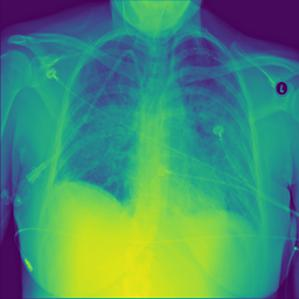

In [ ]:
img=Image.open(random_image_path)
print(f'Random image path: {random_image_path}')
print(f'image class: {image_class}')
print(f'image height:{img.height}')
print(f'image width: {img.width}')
img

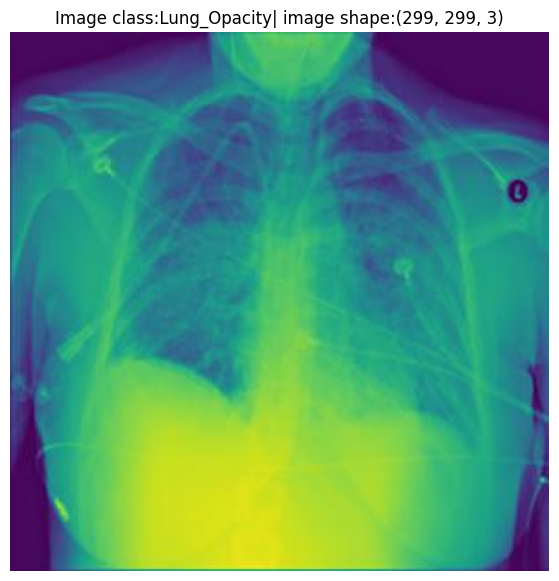

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#turn image into array
img_as_array=np.asarray(img)
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f'Image class:{image_class}| image shape:{img_as_array.shape}')
plt.axis(False);

array([[[ 69,   7,  90],
        [ 70,   8,  91],
        [ 71,   9,  92],
        ...,
        [ 71,   9,  92],
        [ 71,   9,  92],
        [ 71,   9,  92]],

       [[ 69,   7,  90],
        [ 70,   8,  91],
        [ 71,   9,  92],
        ...,
        [ 71,   9,  92],
        [ 71,   9,  92],
        [ 71,   9,  92]],

       [[ 69,   7,  90],
        [ 70,   8,  91],
        [ 71,   9,  92],
        ...,
        [ 71,   9,  92],
        [ 71,   9,  92],
        [ 71,   9,  92]],

       ...,

       [[ 68,   6,  89],
        [ 69,   7,  90],
        [ 70,   8,  91],
        ...,
        [ 77,  34, 114],
        [ 73,  39, 116],
        [ 73,  45, 122]],

       [[ 67,   5,  88],
        [ 68,   6,  89],
        [ 69,   7,  90],
        ...,
        [ 73,  30, 110],
        [ 72,  35, 113],
        [ 71,  40, 118]],

       [[ 66,   4,  87],
        [ 67,   5,  88],
        [ 68,   6,  89],
        ...,
        [ 69,  24, 105],
        [ 67,  30, 108],
        [ 67,  34, 113]]], dtype=uint8)
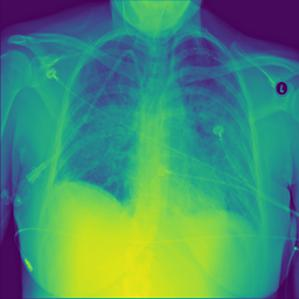

In [ ]:
img_as_array

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

data_transform=transforms.Compose([
    #Resize images
    transforms.Resize(size=(64,64)),
    #Flip the images randomly on the horizonatal
     transforms.RandomHorizontalFlip(p=0.5),
    #Turn the image into a torch.Tensor
    transforms.ToTensor()
])

In [ ]:
torch.Size([3, 64, 64])


torch.Size([3, 64, 64])

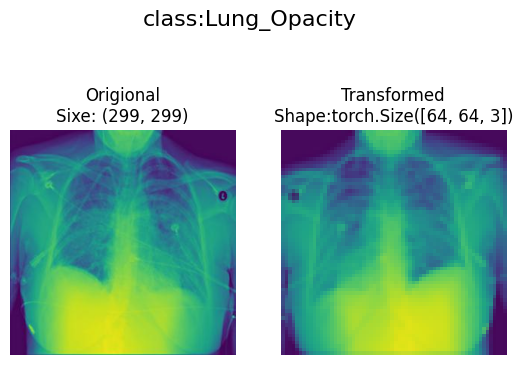

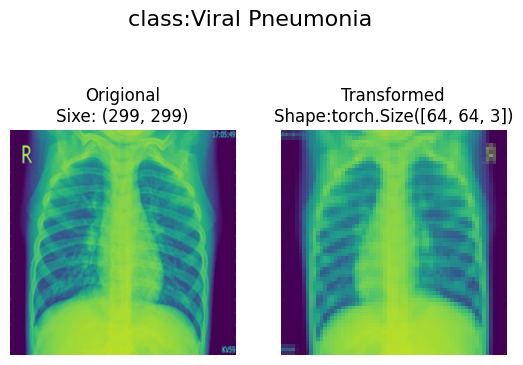

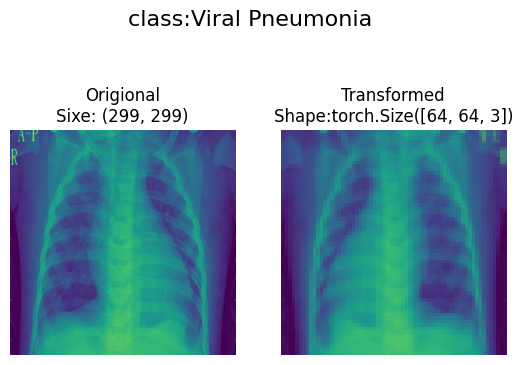

In [ ]:
def plot_transformed_images(image_paths:list, transform, n=3, seed=None):
  #select random images from a path of images and loads then transforms them
  #Then plots the origional vs the transformed version
  if seed:
    random.seed(seed)
  random_image_paths=random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
       fig,ax=plt.subplots(nrows=1,ncols=2)
       ax[0].imshow(f)
       ax[0].set_title(f'Origional\nSixe: {f.size}')
       ax[0].axis(False)

       transformed_image=transform(f).permute(1,2,0) #(c,H,W)-> (H,W,C)
       ax[1].imshow(transformed_image)
       ax[1].set_title(f'Transformed\nShape:{transformed_image.shape}')
       ax[1].axis('off')

       fig.suptitle(f'class:{image_path.parent.stem}',fontsize=16)
plot_transformed_images(image_paths=image_path_list,
    transform=data_transform,
    n=3,
    seed=42
)

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
from pathlib import Path

source_dir = Path("data/lung-disease/Lung X-Ray Image/Lung X-Ray Image")
target_base = Path("data/lung-disease-split")
split_ratio = (0.7, 0.15, 0.15)

# Ensure target base directories exist
for split in ["train", "val", "test"]:
    for class_dir in os.listdir(source_dir):
        os.makedirs(target_base / split / class_dir, exist_ok=True)

# Split and copy images
for class_name in os.listdir(source_dir):
    class_path = source_dir / class_name
    images = list(class_path.glob("*.jpg"))

    train_imgs, temp_imgs = train_test_split(images, test_size=(1 - split_ratio[0]), random_state=42)
    val_imgs, test_imgs = train_test_split(temp_imgs, test_size=split_ratio[2]/(split_ratio[1]+split_ratio[2]), random_state=42)

    for img in train_imgs:
        shutil.copy(img, target_base / "train" / class_name / img.name)
    for img in val_imgs:
        shutil.copy(img, target_base / "val" / class_name / img.name)
    for img in test_imgs:
        shutil.copy(img, target_base / "test" / class_name / img.name)

print(" Dataset split into train/val/test successfully.")


 Dataset split into train/val/test successfully.


In [ ]:
train_dir = "data/lung-disease-split/train"
val_dir = "data/lung-disease-split/val"
test_dir = "data/lung-disease-split/test"


In [ ]:
from torchvision import datasets
train_data=datasets.ImageFolder(
    root=train_dir,
    transform=data_transform, #transform data
    target_transform=None
)
test_data=datasets.ImageFolder(
    root=test_dir,
    transform=data_transform,
    target_transform=None
)
val_data=datasets.ImageFolder(
    root=val_dir,
    transform=data_transform,
    target_transform=None
)

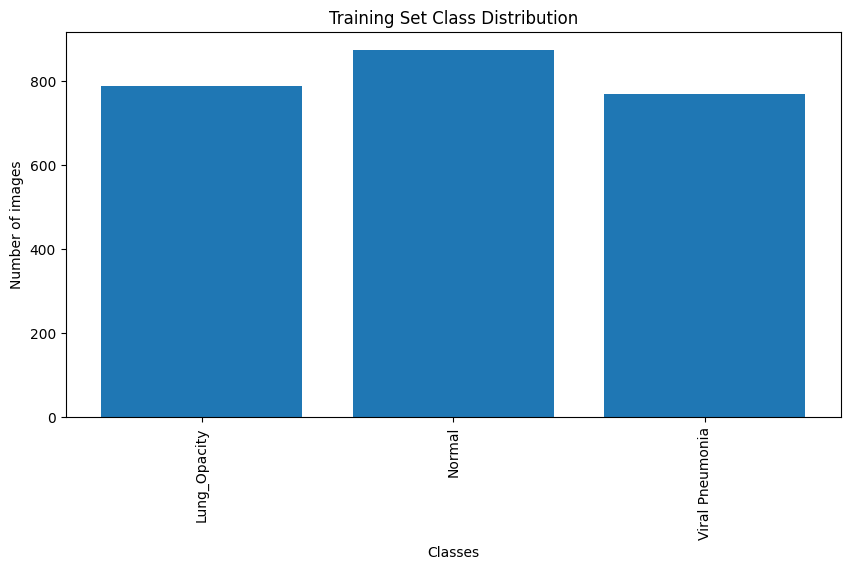

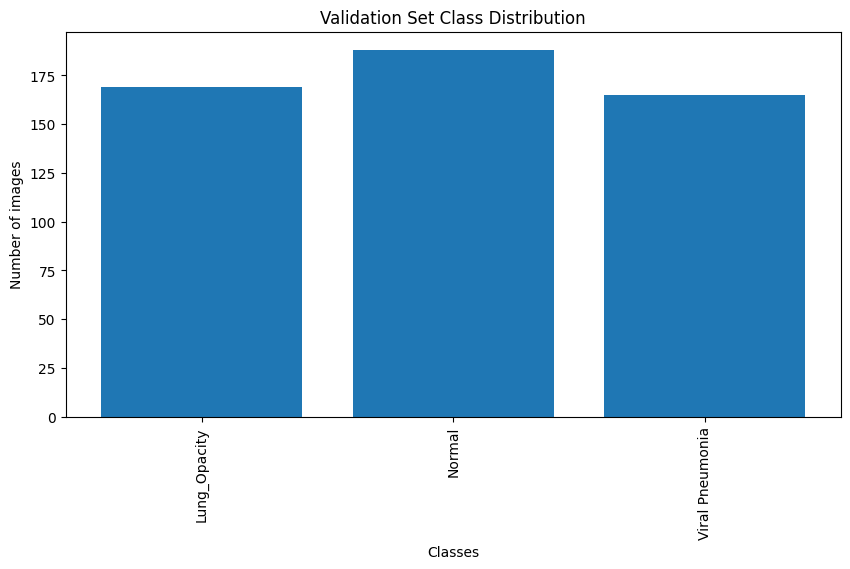

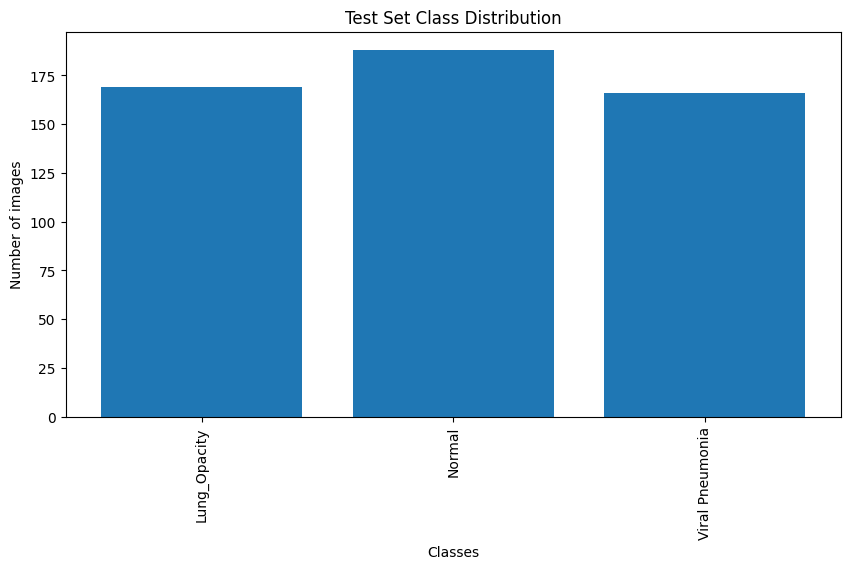

In [ ]:
import matplotlib.pyplot as plt

def plot_class_distribution(dataset, title):
    class_counts = {cls: 0 for cls in dataset.classes}
    for _, label in dataset:
        class_counts[dataset.classes[label]] += 1

    plt.figure(figsize=(10, 5))
    plt.bar(class_counts.keys(), class_counts.values())
    plt.title(title)
    plt.xlabel('Classes')
    plt.ylabel('Number of images')
    plt.xticks(rotation=90)
    plt.show()

plot_class_distribution(train_data, 'Training Set Class Distribution')
plot_class_distribution(val_data, 'Validation Set Class Distribution')
plot_class_distribution(test_data, 'Test Set Class Distribution')

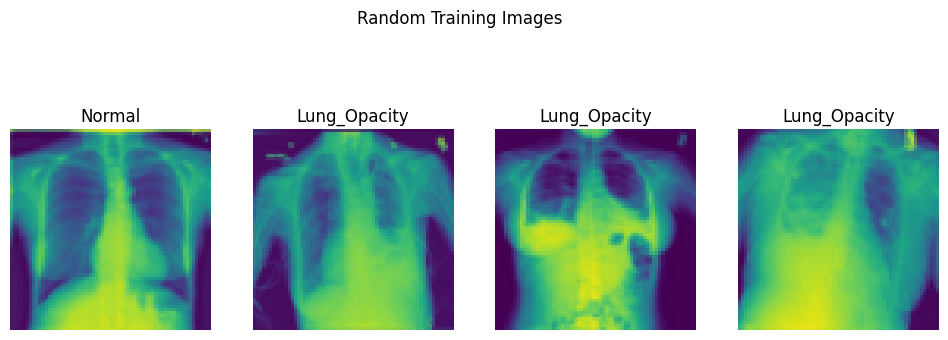

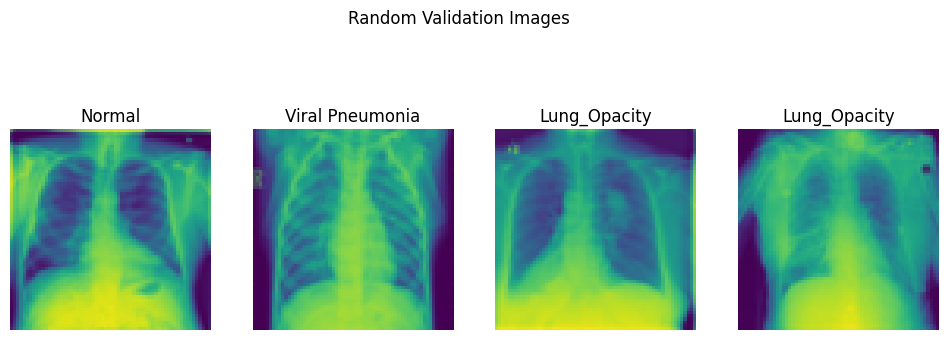

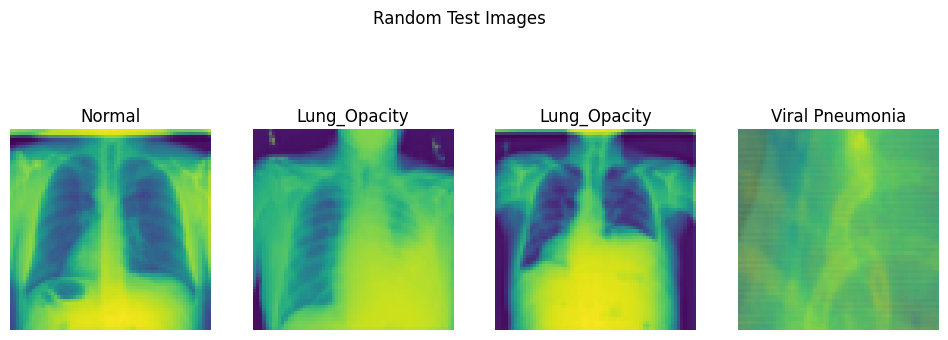

In [ ]:
import torchvision.transforms as transforms

def show_random_images(dataset, title, num_images=4):
    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        idx = torch.randint(len(dataset), size=(1,)).item()
        img, label = dataset[idx]
        img = transforms.ToPILImage()(img)
        plt.subplot(4, 4, i + 1)
        plt.imshow(img)
        plt.title(dataset.classes[label])
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_random_images(train_data, 'Random Training Images')
show_random_images(val_data, 'Random Validation Images')
show_random_images(test_data, 'Random Test Images')


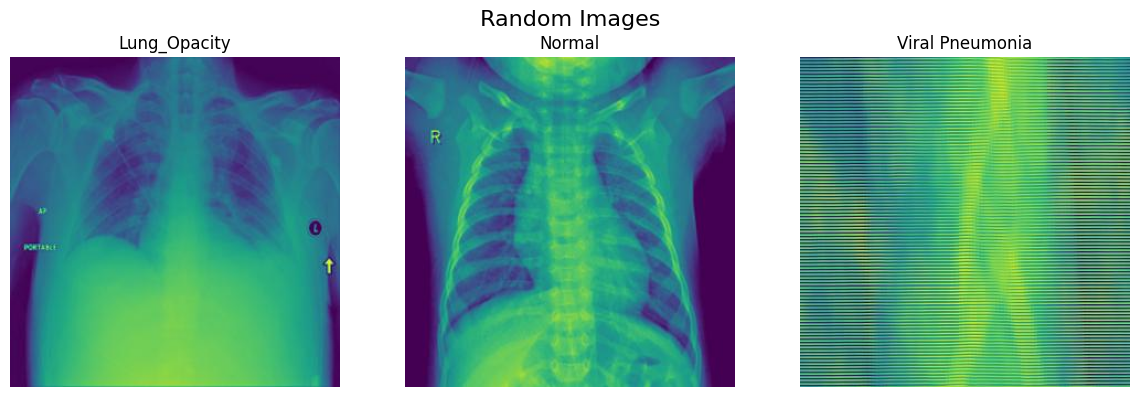

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Path to your raw dataset
raw_dir = "data/lung-disease/Lung X-Ray Image/Lung X-Ray Image"

# Get class names (ignoring hidden files)
classes = [d for d in sorted(os.listdir(raw_dir)) if not d.startswith('.')]

def show_one_per_class(raw_dir, classes):
    plt.figure(figsize=(12, 4))  # Adjust width based on classes
    for i, cls in enumerate(classes):
        cls_dir = os.path.join(raw_dir, cls)
        all_files = [os.path.join(cls_dir, f)
                     for f in os.listdir(cls_dir)
                     if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        if not all_files:
            print(f"No images found in class: {cls}")
            continue
        img_path = random.choice(all_files)
        img = Image.open(img_path).convert('RGB')
        ax = plt.subplot(1, len(classes), i + 1)
        ax.imshow(img)
        ax.set_title(cls)
        ax.axis('off')
    plt.suptitle(" Random Images ", fontsize=16)
    plt.tight_layout()
    plt.show()

show_one_per_class(raw_dir, classes)


In [ ]:
class_names=train_data.classes
class_names

['Lung_Opacity', 'Normal', 'Viral Pneumonia']

In [ ]:
class_dict=train_data.class_to_idx
class_dict

{'Lung_Opacity': 0, 'Normal': 1, 'Viral Pneumonia': 2}

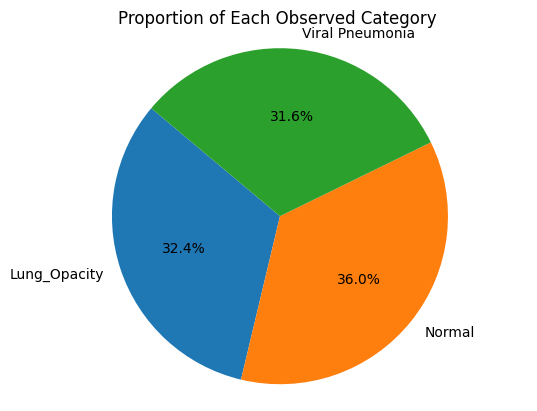

In [ ]:
# Get class counts for visualization
from collections import Counter

import matplotlib.pyplot as plt

# Count number of samples per class
train_counts = [0] * len(class_names)
for _, label in train_data:
    train_counts[label] += 1

# Pie chart
plt.pie(train_counts,
        explode=[0]*len(class_names),
        labels=class_names,
        autopct='%1.1f%%',
        startangle=140)
plt.axis('equal')
plt.title('Proportion of Each Observed Category ')
plt.show()


Number of training samples: 2430
Number of validation samples: 522
Number of test samples: 523
Number of classes: 3
Class names: ['Lung_Opacity', 'Normal', 'Viral Pneumonia']
Length of train dataloader: 76 batches of 32
Length of val dataloader: 17 batches of 32
Length of test dataloader: 17 batches of 32


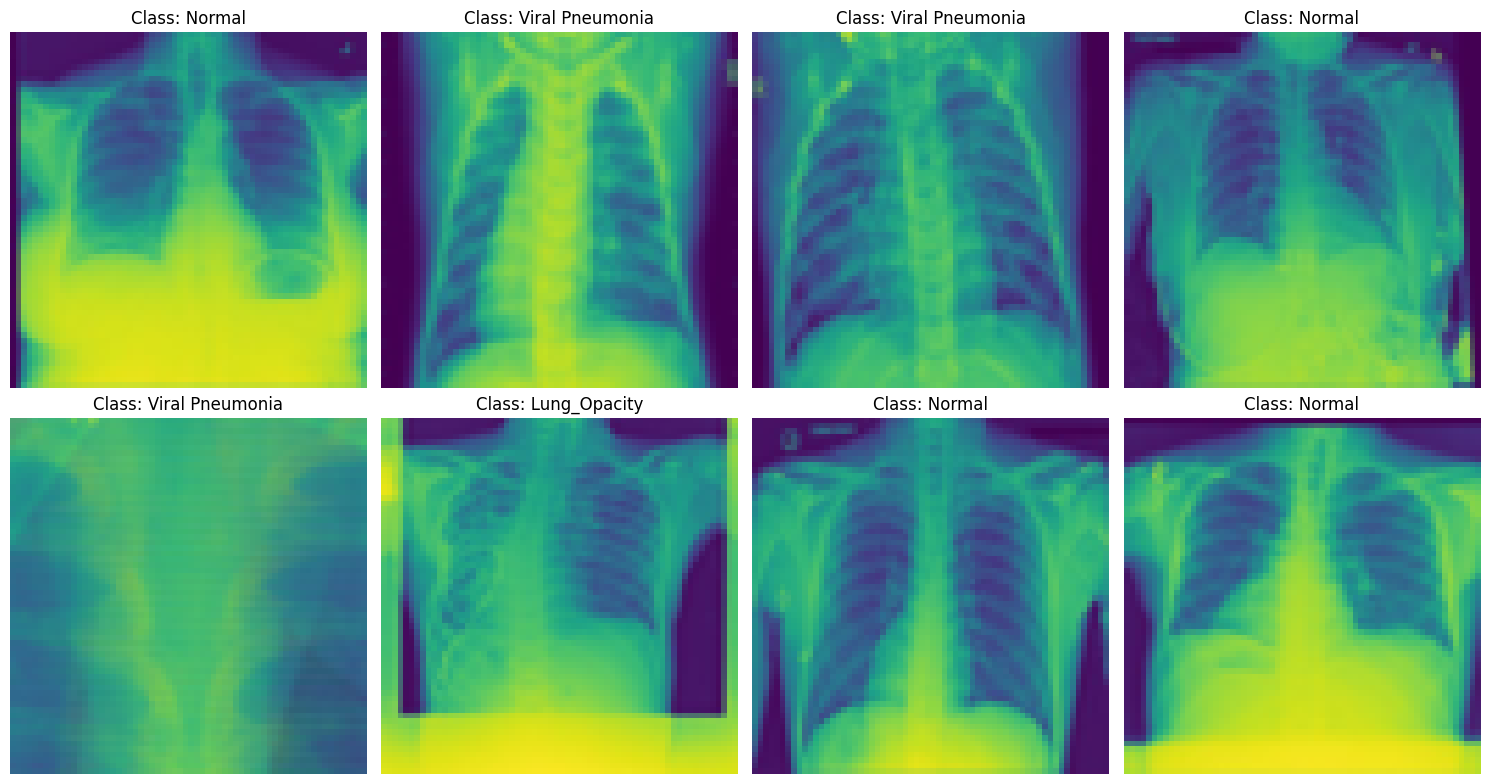

Image batch shape: torch.Size([32, 3, 64, 64])
Label batch shape: torch.Size([32])


In [ ]:
print(f"Number of training samples: {len(train_data)}")
print(f"Number of validation samples: {len(val_data)}")
print(f"Number of test samples: {len(test_data)}")
print(f"Number of classes: {len(class_names)}")
print(f"Class names: {class_names}")

# Create data loaders
BATCH_SIZE = 32
NUM_WORKERS = 2

train_dataloader = DataLoader(dataset=train_data,
                             batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKERS,
                             shuffle=True)

val_dataloader = DataLoader(dataset=val_data,
                           batch_size=BATCH_SIZE,
                           num_workers=NUM_WORKERS,
                           shuffle=False)

test_dataloader = DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            num_workers=NUM_WORKERS,
                            shuffle=False)

print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of val dataloader: {len(val_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

# Visualize a batch of training data
def visualize_batch(dataloader, class_names, num_images=8):
    data_iter = iter(dataloader)
    images, labels = next(data_iter)

    fig, axes = plt.subplots(2, 4, figsize=(15, 8))
    axes = axes.ravel()

    for i in range(min(num_images, len(images))):
        img = images[i].permute(1, 2, 0)  # Change from CHW to HWC
        axes[i].imshow(img)
        axes[i].set_title(f'Class: {class_names[labels[i]]}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

visualize_batch(train_dataloader, class_names)

# Check tensor shapes
train_features_batch, train_labels_batch = next(iter(train_dataloader))
print(f"Image batch shape: {train_features_batch.shape}")
print(f"Label batch shape: {train_labels_batch.shape}")

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.18.0
GPU Available: []


In [ ]:
# =============================================================================
# STEP 1: DATASET CONFIGURATION AND LOADING
# =============================================================================

# Set base paths for dataset
train_dir = "data/lung-disease-split/train"
val_dir = "data/lung-disease-split/val"
test_dir = "data/lung-disease-split/test"

# Verify directories exist
for directory in [train_dir, val_dir, test_dir]:
    if not os.path.exists(directory):
        print(f" Directory not found: {directory}")
        print("Please ensure your dataset is organized correctly.")
        exit(1)

# Image parameters
IMG_SIZE = (64, 64)  # Original image size as specified
BATCH_SIZE = 32
SEED = 42

print("Loading datasets...")
print(f"Image size: {IMG_SIZE}")
print(f"Batch size: {BATCH_SIZE}")

# Load datasets with error handling
try:
    train_ds = tf.keras.utils.image_dataset_from_directory(
        train_dir,
        image_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        seed=SEED,
        validation_split=None
    )

    val_ds = tf.keras.utils.image_dataset_from_directory(
        val_dir,
        image_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        seed=SEED,
        validation_split=None
    )

    test_ds = tf.keras.utils.image_dataset_from_directory(
        test_dir,
        image_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        seed=SEED,
        validation_split=None,
        shuffle=False  # Don't shuffle test data for consistent evaluation
    )

    # Get class information
    class_names = train_ds.class_names
    num_classes = len(class_names)
    print(f"\n Dataset loaded successfully!")
    print(f"Classes: {class_names}")
    print(f"Number of classes: {num_classes}")

except Exception as e:
    print(f" Error loading dataset: {e}")
    print("Please check your dataset structure and paths.")
    exit(1)

Loading datasets...
Image size: (64, 64)
Batch size: 32
Found 2430 files belonging to 3 classes.
Found 522 files belonging to 3 classes.
Found 523 files belonging to 3 classes.

 Dataset loaded successfully!
Classes: ['Lung_Opacity', 'Normal', 'Viral Pneumonia']
Number of classes: 3


In [ ]:
# =============================================================================
# STEP 2: DATA PREPROCESSING
# =============================================================================

print("\nApplying data preprocessing...")

# Data augmentation for training (helps prevent overfitting)
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

# Normalize pixel values to [0,1] range
normalization_layer = layers.Rescaling(1./255)

# Apply preprocessing to datasets
def preprocess_dataset(dataset, augment=False):
    if augment:
        dataset = dataset.map(lambda x, y: (data_augmentation(x, training=True), y))
    dataset = dataset.map(lambda x, y: (normalization_layer(x), y))
    return dataset

train_ds = preprocess_dataset(train_ds, augment=True)
val_ds = preprocess_dataset(val_ds, augment=False)
test_ds = preprocess_dataset(test_ds, augment=False)

# Optimize performance with prefetching and caching
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

print(" Data preprocessing completed!")


Applying data preprocessing...
 Data preprocessing completed!



Visualizing sample training images...


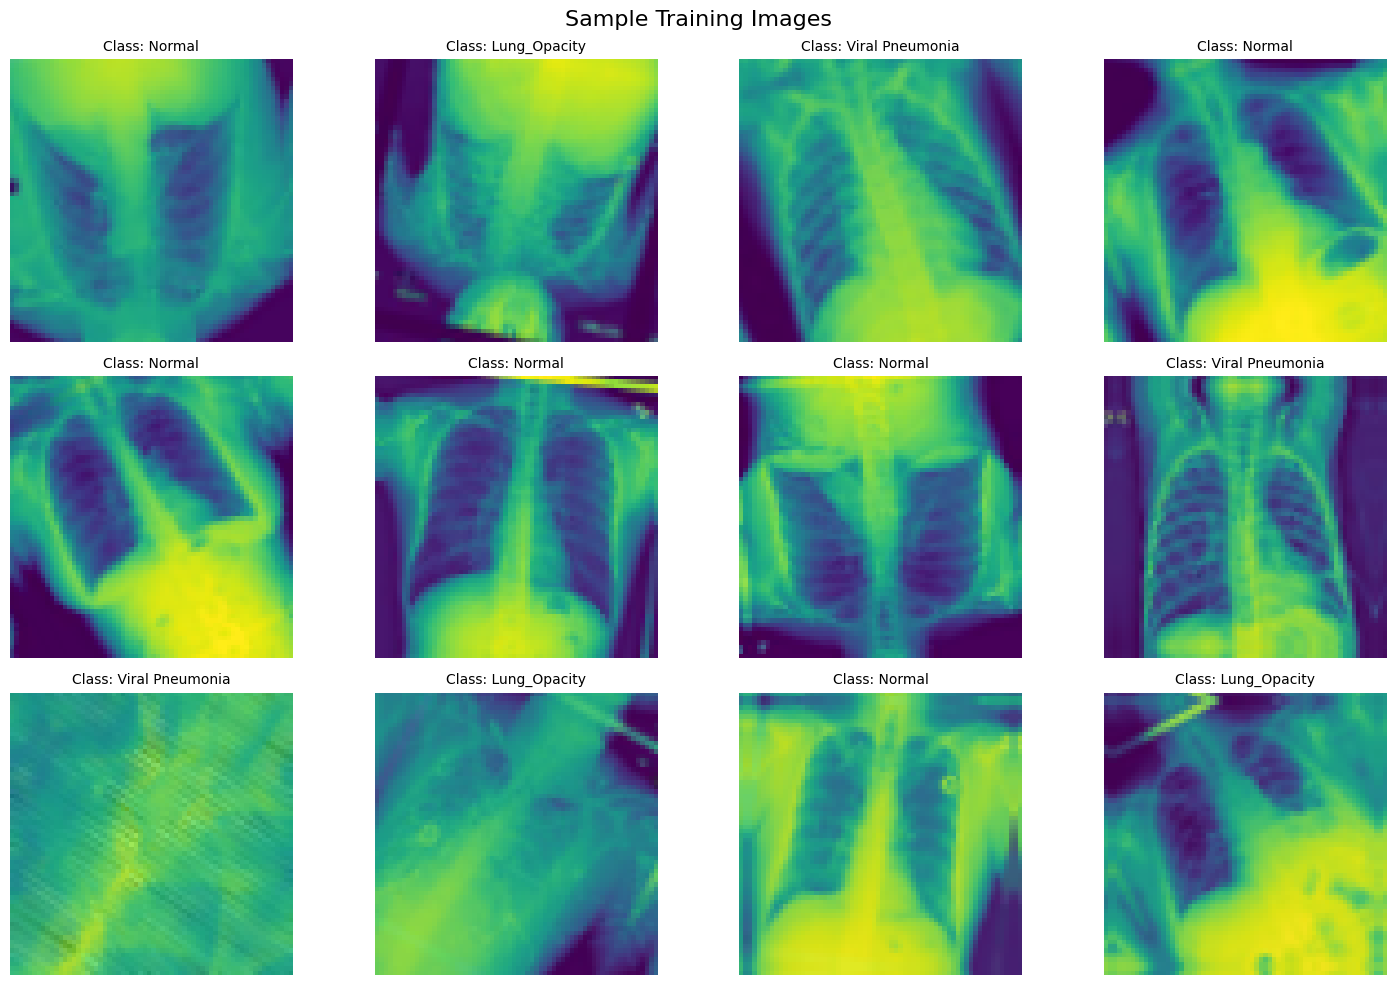

In [ ]:
# =============================================================================
# STEP 3: VISUALIZE SAMPLE DATA
# =============================================================================

print("\nVisualizing sample training images...")

plt.figure(figsize=(15, 10))
for images, labels in train_ds.take(1):
    for i in range(min(12, len(images))):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(f'Class: {class_names[labels[i]]}', fontsize=10)
        plt.axis("off")
plt.suptitle("Sample Training Images", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
# =============================================================================
# MODEL 1: SIMPLE 3 CONVOLUTIONAL LAYERS
# =============================================================================

print("\n" + "="*50)
print("BUILDING MODEL 1: 3 CONVOLUTIONAL LAYERS ARCHITECTURE")
print("="*50)

print("Model 1 : Simple architecture with 3 convolutional layers .")
print("● Three Convolutional Layers")
print("● Three Activation Layers that have ReLU functions")
print("● One Pooling Layer which is MaxPool2d")
print("● One Dropout Layer with probability: 0.5")
print("● One Flatten Layer")
print("● One Linear Fully Connected Layer")
print("● One Sigmoid Output Activation")

model1 = models.Sequential([
    # Convolutional Layer 1: Output Channels=20, Kernel Size=3, Stride=1, Padding=1
    layers.Conv2D(20, kernel_size=3, strides=1, padding='same', input_shape=IMG_SIZE + (3,)),
    layers.ReLU(),  # Activation Layer 1

    # Convolutional Layer 2: Input Channels=20, Output Channels=20, Kernel Size=3, Stride=1, Padding=1
    layers.Conv2D(20, kernel_size=3, strides=1, padding='same'),
    layers.ReLU(),  # Activation Layer 2

    # Convolutional Layer 3: Input Channels=20, Output Channels=20, Kernel Size=3, Stride=1, Padding=1
    layers.Conv2D(20, kernel_size=3, strides=1, padding='same'),
    layers.ReLU(),  # Activation Layer 3

    # MaxPool2d Layer: Kernel Size=2
    layers.MaxPooling2D(pool_size=2),

    # Flatten Layer
    layers.Flatten(),

    # Dropout Layer: Probability = 0.5
    layers.Dropout(0.5),

    # Fully Connected Layer: Input Features = 20 * 32 * 32, Output Features = num_classes
    layers.Dense(num_classes),

    # Sigmoid Output Activation
    layers.Activation('sigmoid')
], name="Model_1_3_Layers")

# Compile Model 1
model1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\nModel 1 Architecture Summary:")
model1.summary()


BUILDING MODEL 1: 3 CONVOLUTIONAL LAYERS ARCHITECTURE
Model 1 : Simple architecture with 3 convolutional layers .
● Three Convolutional Layers
● Three Activation Layers that have ReLU functions
● One Pooling Layer which is MaxPool2d
● One Dropout Layer with probability: 0.5
● One Flatten Layer
● One Linear Fully Connected Layer
● One Sigmoid Output Activation

Model 1 Architecture Summary:


Model: "Model_1_3_Layers"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_49 (Conv2D)              │ (None, 64, 64, 20)     │           560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_61 (ReLU)                 │ (None, 64, 64, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 64, 64, 20)     │         3,620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_62 (ReLU)                 │ (None, 64, 64, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 64, 64, 20)     │         3,620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_63 (ReLU)                 │ (None, 64, 64, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 32, 32, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 20480)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 20480)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 3)              │        61,443 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 3)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,243 (270.48 KB)

 Trainable params: 69,243 (270.48 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print("\n" + "="*50)
print("BUILDING MODEL 2: CORRECTED ARCHITECTURE")
print("="*50)

print("Model 2 : A simple CNN architecture with 2 convolutional layers, 2 max pooling layers, dropout, and fully connected layers for classification.")

model2 = models.Sequential([
    # Convolutional Layer 1: Output Channels = 32, Kernel Size = 5, Stride = 1, Padding = 'same'
    layers.Conv2D(32, kernel_size=5, strides=1, padding='same', input_shape=IMG_SIZE + (3,)),
    layers.ReLU(),  # Activation 1: ReLU activation function

    # MaxPooling Layer 1: Kernel Size = 2
    layers.MaxPooling2D(pool_size=2),

    # Convolutional Layer 2: Output Channels = 64, Kernel Size = 3, Stride = 1, Padding = 'same'
    layers.Conv2D(64, kernel_size=3, strides=1, padding='same'),
    layers.ReLU(),  # Activation 2: ReLU activation function

    # MaxPooling Layer 2: Kernel Size = 2
    layers.MaxPooling2D(pool_size=2),

    # Flatten Layer: Converts 2D feature maps into a 1D feature vector
    layers.Flatten(),

    # Fully Connected Layer 1: 256 units
    layers.Dense(256),
    layers.ReLU(),  # Activation 3: ReLU activation function

    # Dropout Layer: Probability = 0.5, for regularisation
    layers.Dropout(0.5),

    # Fully Connected Layer 2 (Output Layer): Units = num_classes
    layers.Dense(num_classes),

    # Sigmoid Activation: For binary/multi-label classification
    layers.Activation('sigmoid')
], name="Model_2_Corrected_Arch")

# Compile Model 2
model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\nModel 2 Architecture Summary:")
model2.summary()



BUILDING MODEL 2: CORRECTED ARCHITECTURE
Model 2 : A simple CNN architecture with 2 convolutional layers, 2 max pooling layers, dropout, and fully connected layers for classification.

Model 2 Architecture Summary:


Model: "Model_2_Corrected_Arch"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_52 (Conv2D)              │ (None, 64, 64, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_64 (ReLU)                 │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_65 (ReLU)                 │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_66 (ReLU)                 │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 3)              │           771 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 3)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,216,259 (16.08 MB)

 Trainable params: 4,216,259 (16.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

print("\n" + "="*50)
print("BUILDING MODEL 3: FOUR CONVOLUTIONAL LAYERS")
print("="*50)

print("Model 3: Four convolutional layers with increasing filters, fully connected layers, and dropout for regularisation.")
print("● Four Convolutional Layers")
print("● Four Activation Layers that have ReLU functions")
print("● Two Pooling Layers which is MaxPool2D")
print("● One Dropout Layer with probability: 0.5")
print("● One Flatten Layer")
print("● Two Linear Fully Connected Layers")
print("● One Sigmoid Output Activation")

model3 = models.Sequential([

    # Convolutional Layer 1: Output Channels=32, Kernel Size=5, Stride=1, Padding='same'
    layers.Conv2D(32, kernel_size=5, strides=1, padding='same', input_shape=IMG_SIZE + (3,)),
    layers.ReLU(),  # Activation Layer 1

    # Convolutional Layer 2: Output Channels=64, Kernel Size=3, Stride=1, Padding='same'
    layers.Conv2D(64, kernel_size=3, strides=1, padding='same'),
    layers.ReLU(),  # Activation Layer 2

    # MaxPool2D Layer 1: Kernel Size=2
    layers.MaxPooling2D(pool_size=2),

    # Convolutional Layer 3: Output Channels=128, Kernel Size=3, Stride=1, Padding='same'
    layers.Conv2D(128, kernel_size=3, strides=1, padding='same'),
    layers.ReLU(),  # Activation Layer 3

    # Convolutional Layer 4: Output Channels=256, Kernel Size=3, Stride=1, Padding='same'
    layers.Conv2D(256, kernel_size=3, strides=1, padding='same'),
    layers.ReLU(),  # Activation Layer 4

    # MaxPool2D Layer 2: Kernel Size=2
    layers.MaxPooling2D(pool_size=2),

    # Flatten Layer
    layers.Flatten(),

    # Fully Connected Layer 1: Output Features = 256
    layers.Dense(256),
    layers.ReLU(),  # Activation Layer 5

    # Dropout Layer: Probability = 0.5
    layers.Dropout(0.5),

    # Fully Connected Layer 2: Output Features = num_classes
    layers.Dense(num_classes),

    # Sigmoid Output Activation
    layers.Activation('sigmoid')
])

# Compile Model 3
model3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model 3 Summary
print("\nModel 3 Architecture Summary:")
model4.summary()



BUILDING MODEL 3: FOUR CONVOLUTIONAL LAYERS
Model 3: Four convolutional layers with increasing filters, fully connected layers, and dropout for regularisation.
● Four Convolutional Layers
● Four Activation Layers that have ReLU functions
● Two Pooling Layers which is MaxPool2D
● One Dropout Layer with probability: 0.5
● One Flatten Layer
● Two Linear Fully Connected Layers
● One Sigmoid Output Activation

Model 3 Architecture Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 3)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,168,195 (65.49 MB)

 Trainable params: 17,168,195 (65.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Custom callback to evaluate on test set during training
class TestEvaluationCallback(tf.keras.callbacks.Callback):
    def __init__(self, test_data):
        super().__init__()
        self.test_data = test_data
        self.test_losses = []
        self.test_accuracies = []

    def on_epoch_end(self, epoch, logs=None):
        test_loss, test_accuracy = self.model.evaluate(self.test_data, verbose=0)
        self.test_losses.append(test_loss)
        self.test_accuracies.append(test_accuracy)
        print(f"Epoch {epoch + 1} - Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


In [ ]:
# =============================================================================
# MODIFIED TRAINING FUNCTION
# =============================================================================

def train_model_with_test_eval(model, model_name, train_ds, val_ds, test_ds, epochs=5):
    print(f"\n" + "="*60)
    print(f"TRAINING {model_name}")
    print("="*60)

    # Create test evaluation callback
    test_callback = TestEvaluationCallback(test_ds)

    # Get other callbacks
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=7,
            restore_best_weights=True,
            verbose=1
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            patience=4,
            factor=0.2,
            min_lr=1e-7,
            verbose=1
        ),
        tf.keras.callbacks.ModelCheckpoint(
            f'best_{model_name.replace(" ", "_")}.h5',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        ),
        test_callback  # Add test evaluation callback
    ]

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epochs,
        callbacks=callbacks,
        verbose=1
    )

    # Add test metrics to history
    history.history['test_loss'] = test_callback.test_losses
    history.history['test_accuracy'] = test_callback.test_accuracies

    print(f"✅ {model_name} training completed!")
    return history

In [ ]:
# =============================================================================
# TRAINING CONFIGURATION
# =============================================================================

print("\n" + "="*50)
print("SETTING UP TRAINING CONFIGURATION")
print("="*50)

EPOCHS = 5

def get_callbacks(model_name):
    return [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=7,
            restore_best_weights=True,
            verbose=1
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            patience=4,
            factor=0.2,
            min_lr=1e-7,
            verbose=1
        ),
        tf.keras.callbacks.ModelCheckpoint(
            f'best_{model_name}.h5',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        )
    ]



SETTING UP TRAINING CONFIGURATION


In [ ]:
# Train all models with test evaluation
models_info = [
    (model1, "Model 1: 3 Layers CNN"),
    (model2, "Model 2: 2 Layers CNN"),
    (model3, "Model 3: Different Architecture CNN")
]

histories = []
for model, name in models_info:
    history = train_model_with_test_eval(model, name, train_ds, val_ds, test_ds, epochs=5)
    histories.append(history)


TRAINING Model 1: 3 Layers CNN
Epoch 1/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.5308 - loss: 0.9299
Epoch 1: val_accuracy improved from -inf to 0.71456, saving model to best_Model_1:_3_Layers_CNN.h5


Epoch 1 - Test Loss: 0.6240, Test Accuracy: 0.7342
76/76 ━━━━━━━━━━━━━━━━━━━━ 30s 369ms/step - accuracy: 0.5322 - loss: 0.9280 - val_accuracy: 0.7146 - val_loss: 0.6468 - learning_rate: 0.0010
Epoch 2/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.7225 - loss: 0.6200
Epoch 2: val_accuracy improved from 0.71456 to 0.73180, saving model to best_Model_1:_3_Layers_CNN.h5


Epoch 2 - Test Loss: 0.5927, Test Accuracy: 0.7533
76/76 ━━━━━━━━━━━━━━━━━━━━ 29s 383ms/step - accuracy: 0.7228 - loss: 0.6196 - val_accuracy: 0.7318 - val_loss: 0.6045 - learning_rate: 0.0010
Epoch 3/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.7763 - loss: 0.5535
Epoch 3: val_accuracy improved from 0.73180 to 0.74904, saving model to best_Model_1:_3_Layers_CNN.h5


Epoch 3 - Test Loss: 0.5417, Test Accuracy: 0.7744
76/76 ━━━━━━━━━━━━━━━━━━━━ 28s 367ms/step - accuracy: 0.7764 - loss: 0.5532 - val_accuracy: 0.7490 - val_loss: 0.5580 - learning_rate: 0.0010
Epoch 4/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.8026 - loss: 0.5067
Epoch 4: val_accuracy improved from 0.74904 to 0.77586, saving model to best_Model_1:_3_Layers_CNN.h5


Epoch 4 - Test Loss: 0.5220, Test Accuracy: 0.7782
76/76 ━━━━━━━━━━━━━━━━━━━━ 28s 365ms/step - accuracy: 0.8026 - loss: 0.5066 - val_accuracy: 0.7759 - val_loss: 0.5373 - learning_rate: 0.0010
Epoch 5/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.8107 - loss: 0.4799
Epoch 5: val_accuracy improved from 0.77586 to 0.77778, saving model to best_Model_1:_3_Layers_CNN.h5


Epoch 5 - Test Loss: 0.5125, Test Accuracy: 0.7820
76/76 ━━━━━━━━━━━━━━━━━━━━ 30s 396ms/step - accuracy: 0.8106 - loss: 0.4799 - val_accuracy: 0.7778 - val_loss: 0.5351 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 5.
✅ Model 1: 3 Layers CNN training completed!

TRAINING Model 2: 2 Layers CNN
Epoch 1/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.5092 - loss: 0.9847
Epoch 1: val_accuracy improved from -inf to 0.71264, saving model to best_Model_2:_2_Layers_CNN.h5


Epoch 1 - Test Loss: 0.6060, Test Accuracy: 0.7514
76/76 ━━━━━━━━━━━━━━━━━━━━ 23s 284ms/step - accuracy: 0.5106 - loss: 0.9823 - val_accuracy: 0.7126 - val_loss: 0.6448 - learning_rate: 0.0010
Epoch 2/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - accuracy: 0.7240 - loss: 0.6295
Epoch 2: val_accuracy improved from 0.71264 to 0.76054, saving model to best_Model_2:_2_Layers_CNN.h5


Epoch 2 - Test Loss: 0.5336, Test Accuracy: 0.7839
76/76 ━━━━━━━━━━━━━━━━━━━━ 20s 268ms/step - accuracy: 0.7243 - loss: 0.6290 - val_accuracy: 0.7605 - val_loss: 0.5601 - learning_rate: 0.0010
Epoch 3/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.7613 - loss: 0.5564
Epoch 3: val_accuracy improved from 0.76054 to 0.76437, saving model to best_Model_2:_2_Layers_CNN.h5


Epoch 3 - Test Loss: 0.5020, Test Accuracy: 0.7916
76/76 ━━━━━━━━━━━━━━━━━━━━ 22s 284ms/step - accuracy: 0.7616 - loss: 0.5561 - val_accuracy: 0.7644 - val_loss: 0.5279 - learning_rate: 0.0010
Epoch 4/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.7896 - loss: 0.5062
Epoch 4: val_accuracy improved from 0.76437 to 0.79310, saving model to best_Model_2:_2_Layers_CNN.h5


Epoch 4 - Test Loss: 0.4576, Test Accuracy: 0.8050
76/76 ━━━━━━━━━━━━━━━━━━━━ 40s 268ms/step - accuracy: 0.7897 - loss: 0.5059 - val_accuracy: 0.7931 - val_loss: 0.4701 - learning_rate: 0.0010
Epoch 5/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.8023 - loss: 0.4750
Epoch 5: val_accuracy did not improve from 0.79310
Epoch 5 - Test Loss: 0.4752, Test Accuracy: 0.8011
76/76 ━━━━━━━━━━━━━━━━━━━━ 22s 286ms/step - accuracy: 0.8024 - loss: 0.4747 - val_accuracy: 0.7759 - val_loss: 0.4969 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 4.
✅ Model 2: 2 Layers CNN training completed!

TRAINING Model 3: Different Architecture CNN
Epoch 1/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4858 - loss: 1.0180
Epoch 1: val_accuracy improved from -inf to 0.70498, saving model to best_Model_3:_Different_Architecture_CNN.h5


Epoch 1 - Test Loss: 0.6682, Test Accuracy: 0.7132
76/76 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.4875 - loss: 1.0156 - val_accuracy: 0.7050 - val_loss: 0.7119 - learning_rate: 0.0010
Epoch 2/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7157 - loss: 0.6575
Epoch 2: val_accuracy improved from 0.70498 to 0.75479, saving model to best_Model_3:_Different_Architecture_CNN.h5


Epoch 2 - Test Loss: 0.5227, Test Accuracy: 0.7859
76/76 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.7159 - loss: 0.6571 - val_accuracy: 0.7548 - val_loss: 0.5412 - learning_rate: 0.0010
Epoch 3/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7599 - loss: 0.5556
Epoch 3: val_accuracy improved from 0.75479 to 0.78544, saving model to best_Model_3:_Different_Architecture_CNN.h5


Epoch 3 - Test Loss: 0.5013, Test Accuracy: 0.7801
76/76 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.7601 - loss: 0.5555 - val_accuracy: 0.7854 - val_loss: 0.5205 - learning_rate: 0.0010
Epoch 4/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7771 - loss: 0.5436
Epoch 4: val_accuracy did not improve from 0.78544
Epoch 4 - Test Loss: 0.4971, Test Accuracy: 0.7782
76/76 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.7773 - loss: 0.5432 - val_accuracy: 0.7682 - val_loss: 0.5072 - learning_rate: 0.0010
Epoch 5/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7905 - loss: 0.4867
Epoch 5: val_accuracy improved from 0.78544 to 0.80268, saving model to best_Model_3:_Different_Architecture_CNN.h5


Epoch 5 - Test Loss: 0.4372, Test Accuracy: 0.8126
76/76 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.7906 - loss: 0.4865 - val_accuracy: 0.8027 - val_loss: 0.4601 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 5.
✅ Model 3: Different Architecture CNN training completed!


In [ ]:
import matplotlib.pyplot as plt

def plot_training_history_with_test(histories, model_names):
    """
    Plots training, validation, and test accuracy/loss for multiple models.
    """
    plt.figure(figsize=(14, 6))

    # Accuracy
    plt.subplot(1, 2, 1)
    for history, name in zip(histories, model_names):
        epochs = range(1, len(history.history['accuracy']) + 1)
        plt.plot(epochs, history.history['accuracy'], label=f'{name} Train Acc')
        plt.plot(epochs, history.history['val_accuracy'], linestyle='--', label=f'{name} Val Acc')
        plt.plot(epochs, history.history['test_accuracy'], linestyle=':', label=f'{name} Test Acc')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    for history, name in zip(histories, model_names):
        epochs = range(1, len(history.history['loss']) + 1)
        plt.plot(epochs, history.history['loss'], label=f'{name} Train Loss')
        plt.plot(epochs, history.history['val_loss'], linestyle='--', label=f'{name} Val Loss')
        plt.plot(epochs, history.history['test_loss'], linestyle=':', label=f'{name} Test Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [ ]:
def plot_individual_model_with_test(history, model_name):
    """
    Plots training, validation, and test accuracy/loss for a single model.
    """
    epochs = range(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(14, 6))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Train Acc')
    plt.plot(epochs, history.history['val_accuracy'], label='Val Acc')
    plt.plot(epochs, history.history['test_accuracy'], label='Test Acc')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Train Loss')
    plt.plot(epochs, history.history['val_loss'], label='Val Loss')
    plt.plot(epochs, history.history['test_loss'], label='Test Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()



In [ ]:
def plot_training_history(histories, model_names):
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

    for i, (history, name, color) in enumerate(zip(histories, model_names, colors)):
        # Accuracy plot
        axes[0, i].plot(history.history['accuracy'], 'o-', label='Train Accuracy',
                        color=color, linewidth=2, markersize=4)
        axes[0, i].plot(history.history['val_accuracy'], 's--', label='Val Accuracy',
                        color=color, alpha=0.7, linewidth=2, markersize=4)
        axes[0, i].plot(history.history['test_accuracy'], 'd:', label='Test Accuracy',
                        color=color, alpha=0.9, linewidth=2, markersize=4)

        axes[0, i].set_title(f'{name} - Accuracy', fontsize=12, fontweight='bold')
        axes[0, i].set_xlabel('Epoch')
        axes[0, i].set_ylabel('Accuracy')
        axes[0, i].legend()
        axes[0, i].grid(True, alpha=0.3)

        # Loss plot
        axes[1, i].plot(history.history['loss'], 'o-', label='Train Loss',
                        color=color, linewidth=2, markersize=4)
        axes[1, i].plot(history.history['val_loss'], 's--', label='Val Loss',
                        color=color, alpha=0.7, linewidth=2, markersize=4)
        axes[1, i].plot(history.history['test_loss'], 'd:', label='Test Loss',
                        color=color, alpha=0.9, linewidth=2, markersize=4)

        axes[1, i].set_title(f'{name} - Loss', fontsize=12, fontweight='bold')
        axes[1, i].set_xlabel('Epoch')
        axes[1, i].set_ylabel('Loss')
        axes[1, i].legend()
        axes[1, i].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


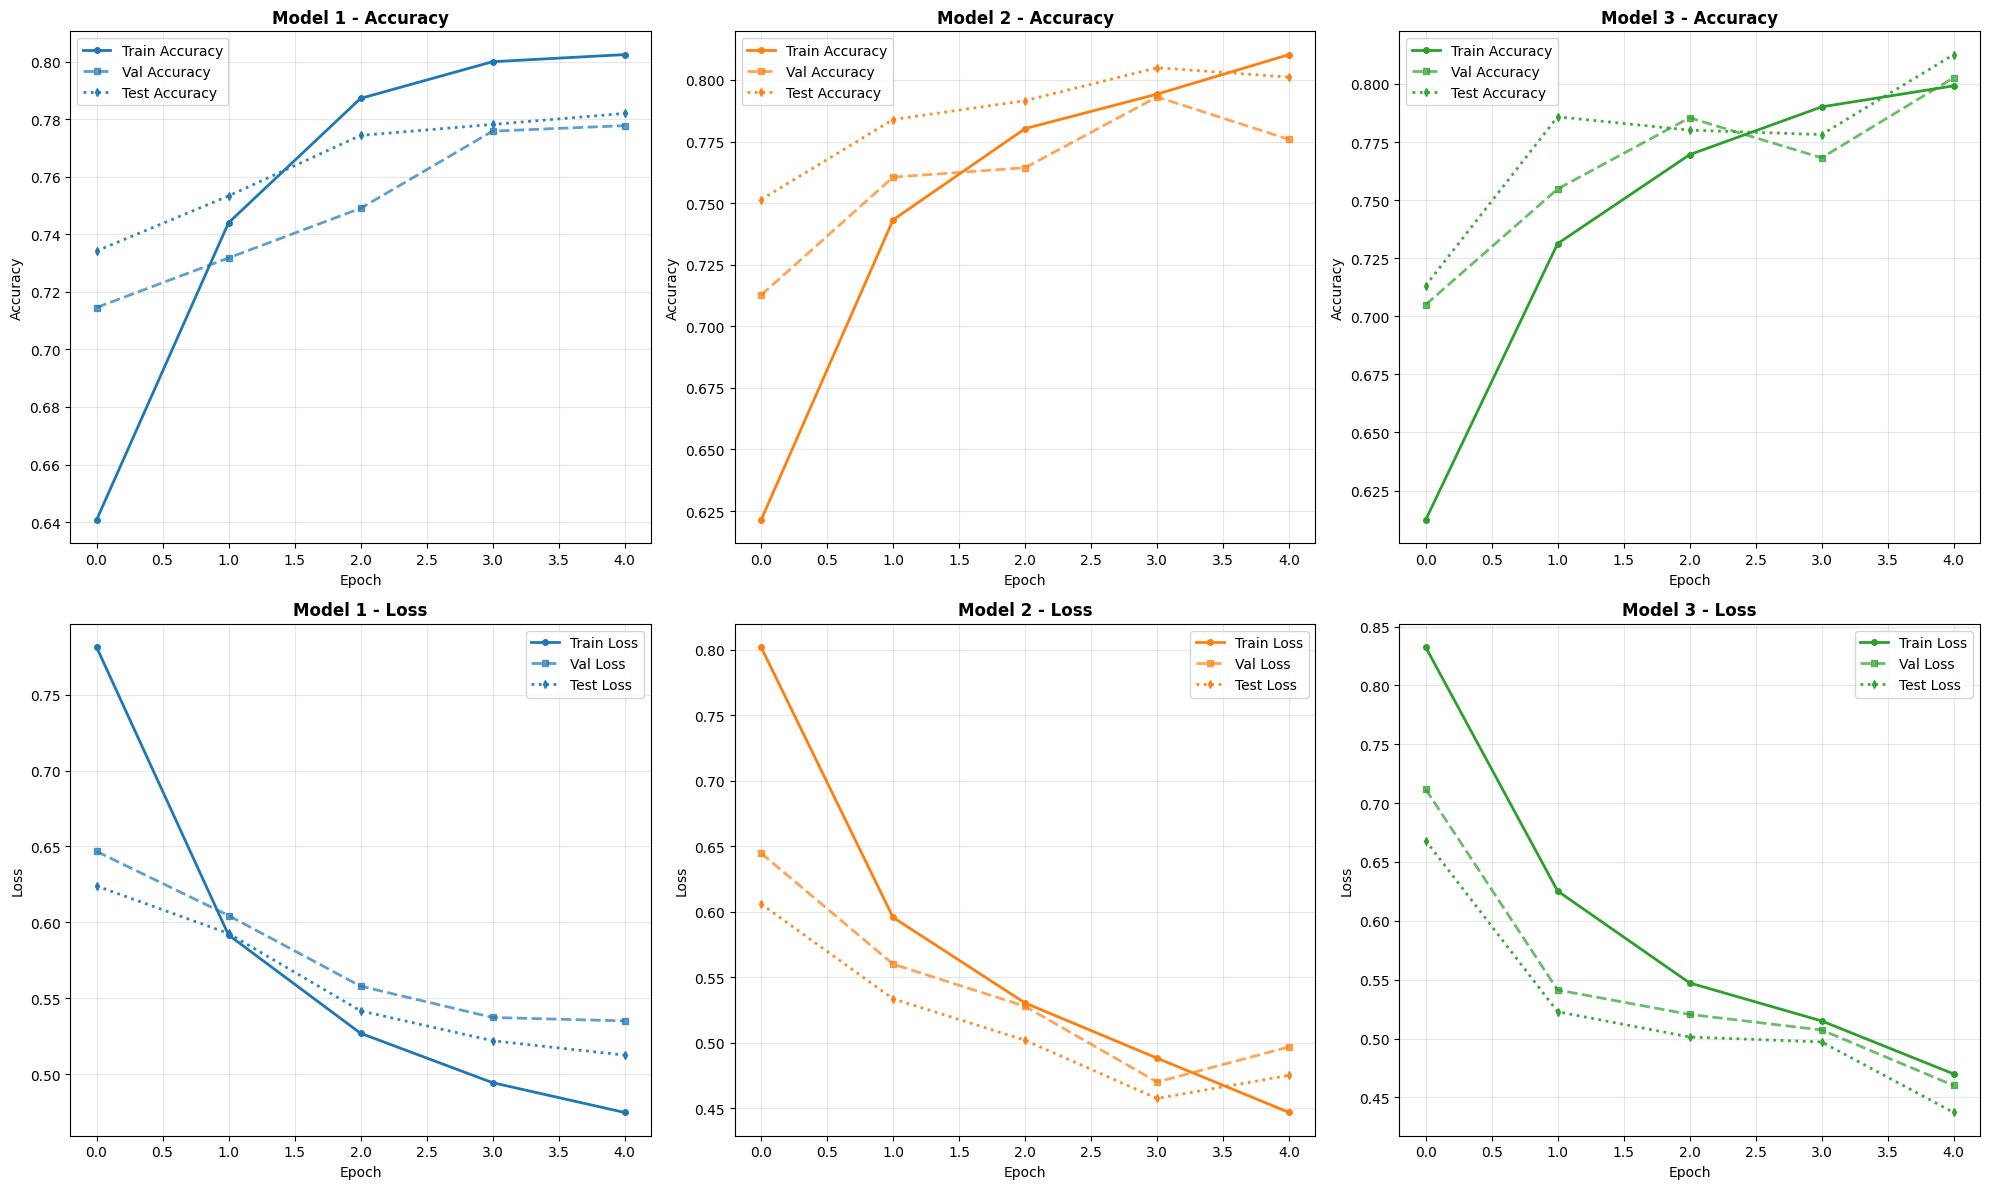

In [ ]:
model_names_short = ["Model 1", "Model 2", "Model 3"]
plot_training_history(histories, model_names_short)


In [ ]:
# =============================================================================
# ALTERNATIVE: IF YOU WANT TO USE YOUR ORIGINAL LOOP STRUCTURE
# =============================================================================

def plot_from_lists_with_test(model_names, train_losses, val_losses, test_losses,
                             train_accuracies, val_accuracies, test_accuracies):
    """
    Plot from separate lists including test metrics
    """

    for name, train_loss, val_loss, test_loss, train_acc, val_acc, test_acc in zip(
        model_names, train_losses, val_losses, test_losses,
        train_accuracies, val_accuracies, test_accuracies):

        print(f"\n{name} - Length check:")
        print(f"Train losses: {len(train_loss)}, Val losses: {len(val_loss)}, Test losses: {len(test_loss)}")
        print(f"Train accuracies: {len(train_acc)}, Val accuracies: {len(val_acc)}, Test accuracies: {len(test_acc)}")

        # Find minimum length to ensure consistency
        min_length = min(len(train_loss), len(val_loss), len(test_loss),
                        len(train_acc), len(val_acc), len(test_acc))
        print(f"{name} - Using minimum length: {min_length}")

        epochs_range = range(1, min_length + 1)

        plt.figure(figsize=(12, 4))

        # Plot Loss
        plt.subplot(1, 2, 1)
        plt.plot(epochs_range, train_loss[:min_length], 'o-', label='Train Loss', linewidth=2, markersize=4)
        plt.plot(epochs_range, val_loss[:min_length], 's-', label='Validation Loss', linewidth=2, markersize=4)
        plt.plot(epochs_range, test_loss[:min_length], '^-', label='Test Loss', color='red', linewidth=2, markersize=4)
        plt.title(f'{name} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # Plot Accuracy
        plt.subplot(1, 2, 2)
        plt.plot(epochs_range, train_acc[:min_length], 'o-', label='Train Accuracy', linewidth=2, markersize=4)
        plt.plot(epochs_range, val_acc[:min_length], 's-', label='Validation Accuracy', linewidth=2, markersize=4)
        plt.plot(epochs_range, test_acc[:min_length], '^-', label='Test Accuracy', color='red', linewidth=2, markersize=4)
        plt.title(f'{name} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()


In [ ]:
# # =============================================================================
# # TRAIN ALL MODELS
# # =============================================================================

# def train_model(model, model_name):
#     print(f"\n" + "="*60)
#     print(f"TRAINING {model_name}")
#     print("="*60)

#     history = model.fit(
#         train_ds,
#         validation_data=val_ds,
#         epochs=EPOCHS,
#         callbacks=get_callbacks(model_name.replace(' ', '_')),
#         verbose=1
#     )

#     print(f"✅ {model_name} training completed!")
#     return history

# # Train all models
# models_info = [
#     (model1, "Model 1: 11 Layers CNN"),
#     (model2, "Model 2: Different Architecture CNN"),
#     (model3, "Model 3: Powerful Deep CNN")
# ]

# histories = []
# for model, name in models_info:
#     history = train_model(model, name)
#     histories.append(history)

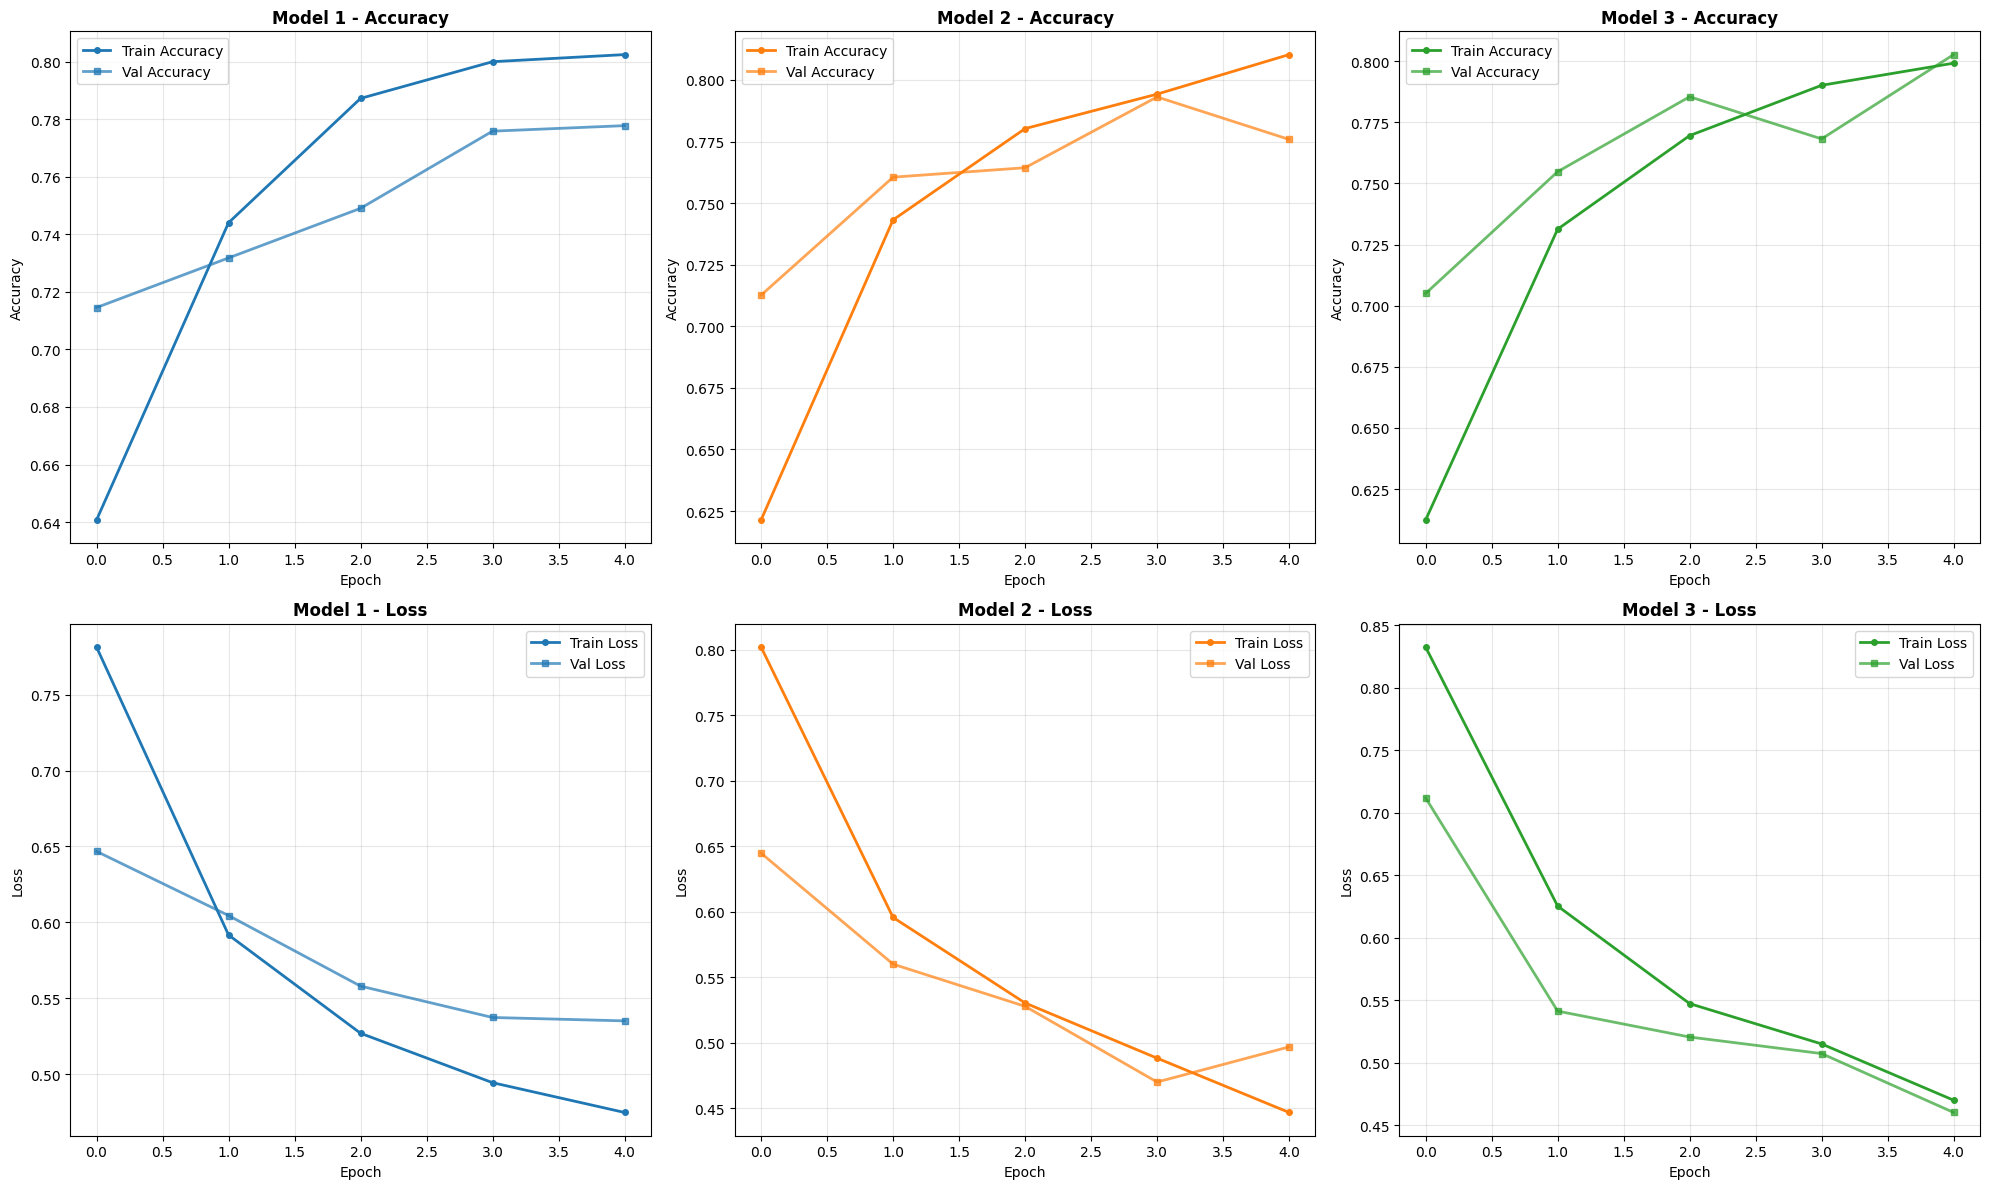

In [ ]:
# =============================================================================
# VISUALIZE TRAINING HISTORY
# =============================================================================

def plot_training_history(histories, model_names):
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

    for i, (history, name, color) in enumerate(zip(histories, model_names, colors)):
        # Accuracy plot
        axes[0, i].plot(history.history['accuracy'], 'o-', label='Train Accuracy',
                       color=color, linewidth=2, markersize=4)
        axes[0, i].plot(history.history['val_accuracy'], 's-', label='Val Accuracy',
                       color=color, alpha=0.7, linewidth=2, markersize=4)
        axes[0, i].set_title(f'{name} - Accuracy', fontsize=12, fontweight='bold')
        axes[0, i].set_xlabel('Epoch')
        axes[0, i].set_ylabel('Accuracy')
        axes[0, i].legend()
        axes[0, i].grid(True, alpha=0.3)

        # Loss plot
        axes[1, i].plot(history.history['loss'], 'o-', label='Train Loss',
                       color=color, linewidth=2, markersize=4)
        axes[1, i].plot(history.history['val_loss'], 's-', label='Val Loss',
                       color=color, alpha=0.7, linewidth=2, markersize=4)
        axes[1, i].set_title(f'{name} - Loss', fontsize=12, fontweight='bold')
        axes[1, i].set_xlabel('Epoch')
        axes[1, i].set_ylabel('Loss')
        axes[1, i].legend()
        axes[1, i].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Plot training histories
model_names_short = ["Model 1", "Model 2", "Model 3"]
plot_training_history(histories, model_names_short)



Evaluating Model 1: 3 Layers CNN...

📋 Classification Report for Model 1: 3 Layers CNN:
                 precision    recall  f1-score   support

   Lung_Opacity     0.6935    0.8166    0.7500       169
         Normal     0.8369    0.6277    0.7173       188
Viral Pneumonia     0.8361    0.9217    0.8768       166

       accuracy                         0.7820       523
      macro avg     0.7888    0.7886    0.7814       523
   weighted avg     0.7903    0.7820    0.7785       523



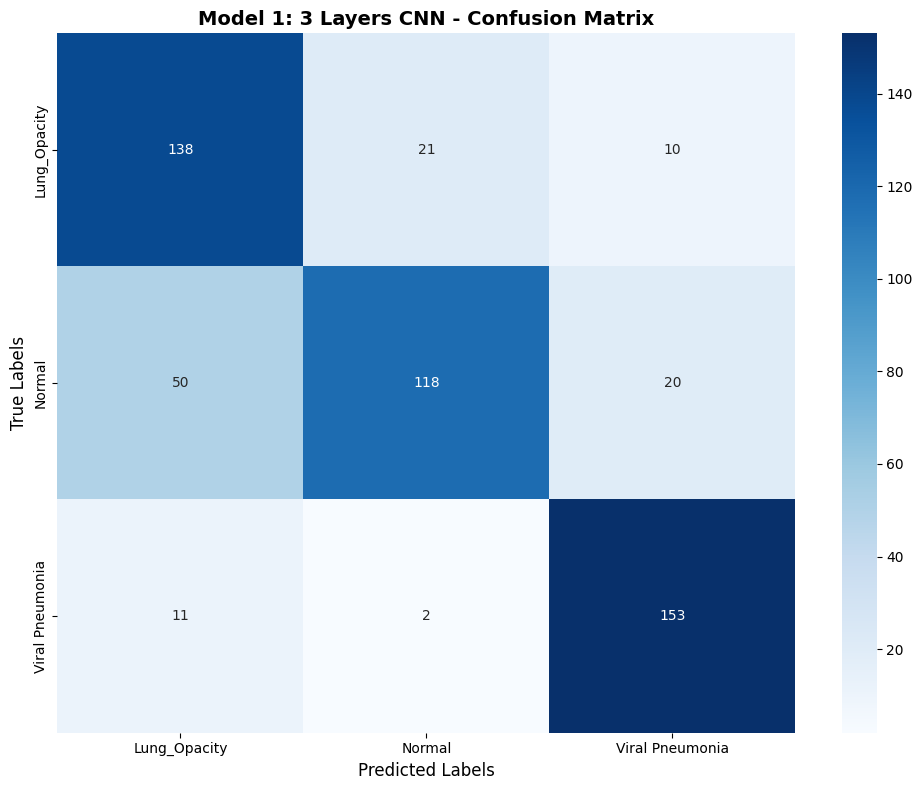

✅ Test Accuracy for Model 1: 3 Layers CNN: 0.7820

Evaluating Model 2: 2 Layers CNN...

📋 Classification Report for Model 2: 2 Layers CNN:
                 precision    recall  f1-score   support

   Lung_Opacity     0.7386    0.7692    0.7536       169
         Normal     0.8057    0.7500    0.7769       188
Viral Pneumonia     0.8721    0.9036    0.8876       166

       accuracy                         0.8050       523
      macro avg     0.8055    0.8076    0.8060       523
   weighted avg     0.8051    0.8050    0.8045       523



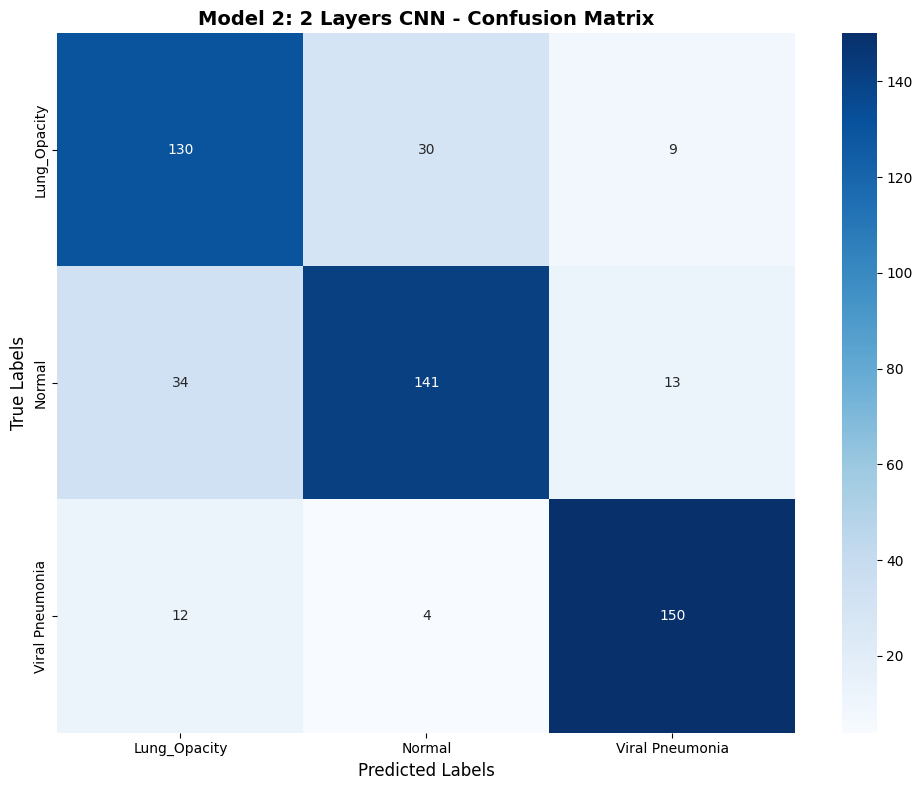

✅ Test Accuracy for Model 2: 2 Layers CNN: 0.8050

Evaluating Model 3: Different Architecture CNN...

📋 Classification Report for Model 3: Different Architecture CNN:
                 precision    recall  f1-score   support

   Lung_Opacity     0.7486    0.7929    0.7701       169
         Normal     0.8057    0.7500    0.7769       188
Viral Pneumonia     0.8876    0.9036    0.8955       166

       accuracy                         0.8126       523
      macro avg     0.8140    0.8155    0.8142       523
   weighted avg     0.8132    0.8126    0.8123       523



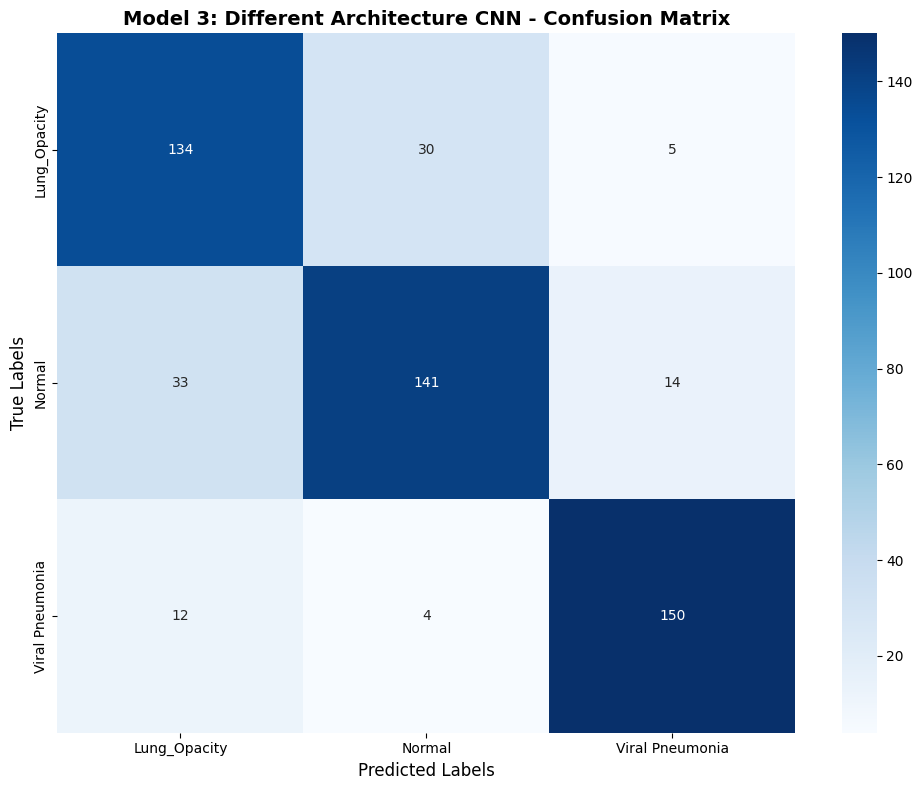

✅ Test Accuracy for Model 3: Different Architecture CNN: 0.8126


In [ ]:
# =============================================================================
# COMPREHENSIVE MODEL EVALUATION
# =============================================================================

def evaluate_model_comprehensive(model, test_ds, model_name, class_names):
    print(f"\nEvaluating {model_name}...")

    # Get predictions
    y_true = []
    y_pred_probs = []

    for images, labels in test_ds:
        predictions = model.predict(images, verbose=0)
        y_pred_probs.extend(predictions)
        y_true.extend(labels.numpy())

    y_pred_probs = np.array(y_pred_probs)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.array(y_true)

    test_accuracy = np.mean(y_true == y_pred)

    # Classification report
    print(f"\n📋 Classification Report for {model_name}:")
    print("="*60)
    print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'{model_name} - Confusion Matrix', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted Labels', fontsize=12)
    plt.ylabel('True Labels', fontsize=12)
    plt.tight_layout()
    plt.show()

    print(f"✅ Test Accuracy for {model_name}: {test_accuracy:.4f}")
    return test_accuracy, y_true, y_pred, y_pred_probs

# Evaluate all models
models_list = [model1, model2, model3]
model_names_full = [name for _, name in models_info]
evaluation_results = []

for model, name in zip(models_list, model_names_full):
    accuracy, y_true, y_pred, y_pred_probs = evaluate_model_comprehensive(
        model, test_ds, name, class_names
    )
    evaluation_results.append({
        'model': model,
        'name': name,
        'accuracy': accuracy,
        'y_true': y_true,
        'y_pred': y_pred,
        'y_pred_probs': y_pred_probs
    })


FINAL MODEL COMPARISON


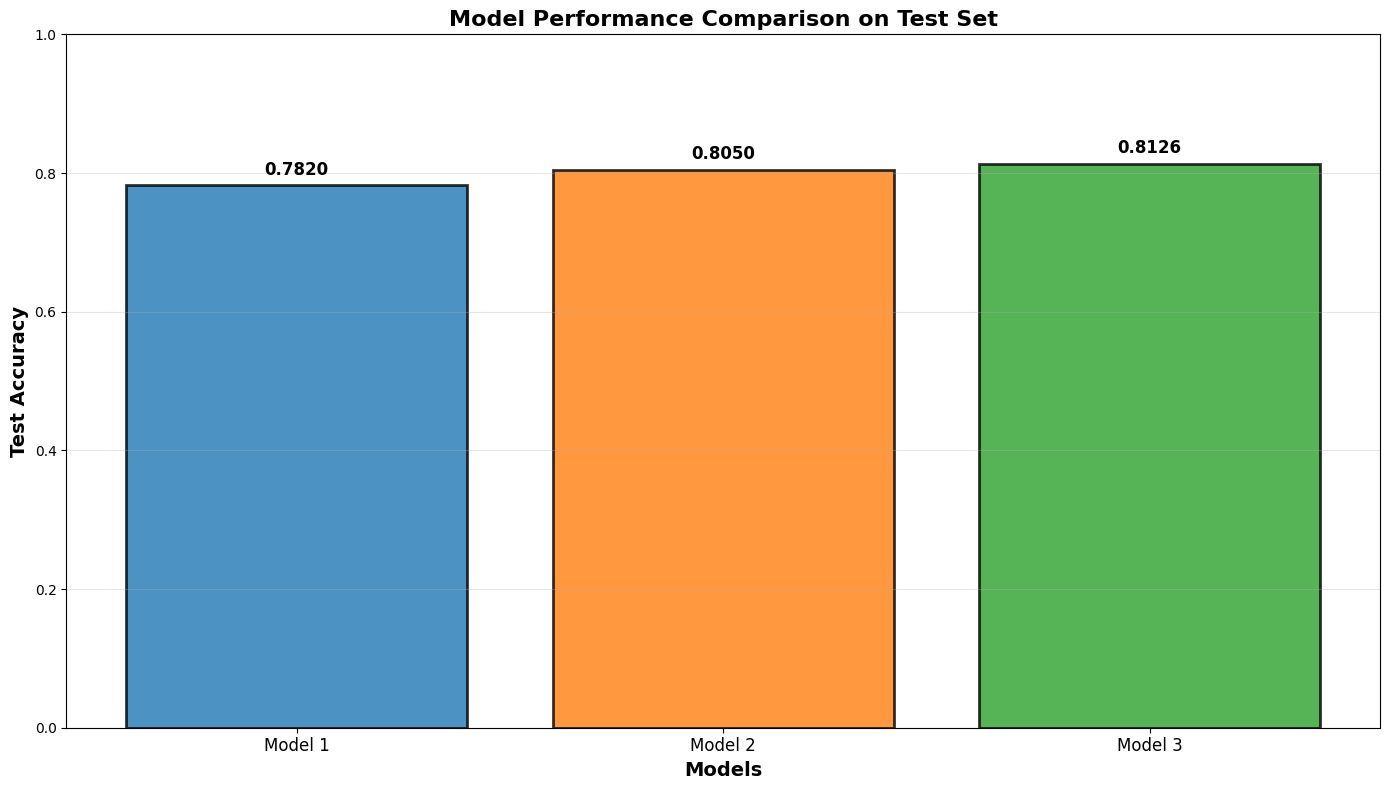


FINAL RESULTS SUMMARY
Model 1: 3 Layers CNN: 0.7820
Model 2: 2 Layers CNN: 0.8050
Model 3: Different Architecture CNN: 0.8126

🏆 Best performing model: Model 3: Different Architecture CNN
🎯 Best test accuracy: 0.8126

💾 Best model saved as 'best_lung_disease_model.keras'

🎉 TRAINING AND EVALUATION COMPLETED SUCCESSFULLY! 🎉


In [ ]:
# =============================================================================
# FINAL COMPARISON AND RESULTS
# =============================================================================

print("\n" + "="*50)
print("FINAL MODEL COMPARISON")
print("="*50)

# Extract accuracies
test_accuracies = [result['accuracy'] for result in evaluation_results]

# Create comparison plot
plt.figure(figsize=(14, 8))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
bars = plt.bar(range(len(model_names_full)), test_accuracies,
               color=colors, alpha=0.8, edgecolor='black', linewidth=2)

plt.xlabel('Models', fontsize=14, fontweight='bold')
plt.ylabel('Test Accuracy', fontsize=14, fontweight='bold')
plt.title('Model Performance Comparison on Test Set', fontsize=16, fontweight='bold')
plt.xticks(range(len(model_names_full)), model_names_short, rotation=0, fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (bar, acc) in enumerate(zip(bars, test_accuracies)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{acc:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

# Print final summary
print(f"\n{'='*60}")
print("FINAL RESULTS SUMMARY")
print(f"{'='*60}")

for result in evaluation_results:
    print(f"{result['name']}: {result['accuracy']:.4f}")

# Find and save best model
best_model_idx = np.argmax(test_accuracies)
best_result = evaluation_results[best_model_idx]

print(f"\n🏆 Best performing model: {best_result['name']}")
print(f"🎯 Best test accuracy: {best_result['accuracy']:.4f}")

# Save the best model
try:
    best_result['model'].save('best_lung_disease_model.keras')
    print(f"\n💾 Best model saved as 'best_lung_disease_model.keras'")
except Exception as e:
    print(f"\n❌ Error saving model: {e}")

print(f"\n{'='*60}")
print("🎉 TRAINING AND EVALUATION COMPLETED SUCCESSFULLY! 🎉")
print(f"{'='*60}")

In [ ]:
# =============================================================================
# MODIFIED TRAINING FUNCTION TO INCLUDE TEST EVALUATION PER EPOCH
# =============================================================================

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Custom callback to evaluate on test set during training
class TestEvaluationCallback(tf.keras.callbacks.Callback):
    def __init__(self, test_data):
        super().__init__()
        self.test_data = test_data
        self.test_losses = []
        self.test_accuracies = []

    def on_epoch_end(self, epoch, logs=None):
        test_loss, test_accuracy = self.model.evaluate(self.test_data, verbose=0)
        self.test_losses.append(test_loss)
        self.test_accuracies.append(test_accuracy)
        print(f"Epoch {epoch + 1} - Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# =============================================================================
# MODIFIED TRAINING FUNCTION
# =============================================================================

def train_model_with_test_eval(model, model_name, train_ds, val_ds, test_ds, epochs=5):
    print(f"\n" + "="*60)
    print(f"TRAINING {model_name}")
    print("="*60)

    # Create test evaluation callback
    test_callback = TestEvaluationCallback(test_ds)

    # Get other callbacks
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=7,
            restore_best_weights=True,
            verbose=1
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            patience=4,
            factor=0.2,
            min_lr=1e-7,
            verbose=1
        ),
        tf.keras.callbacks.ModelCheckpoint(
            f'best_{model_name.replace(" ", "_")}.h5',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        ),
        test_callback  # Add test evaluation callback
    ]

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epochs,
        callbacks=callbacks,
        verbose=1
    )

    # Add test metrics to history
    history.history['test_loss'] = test_callback.test_losses
    history.history['test_accuracy'] = test_callback.test_accuracies

    print(f"✅ {model_name} training completed!")
    return history

In [ ]:


#    # =============================================================================
# # PLOTTING FUNCTION WITH TEST METRICS
# # =============================================================================

# def plot_training_history_with_test(histories, model_names):
#     """
#     Plot training, validation, and test history for multiple models
#     """

#     fig, axes = plt.subplots(len(model_names), 2, figsize=(15, 5 * len(model_names)))

#     # If only one model, ensure axes is 2D
#     if len(model_names) == 1:
#         axes = axes.reshape(1, -1)

#     colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

#     for i, (history, name) in enumerate(zip(histories, model_names)):
#         color = colors[i % len(colors)]

#         # Get the actual number of epochs
#         epochs_range = range(1, len(history.history['loss']) + 1)

#         # Plot Loss
#         axes[i, 0].plot(epochs_range, history.history['loss'],
#                        'o-', label='Training Loss', color=color, linewidth=2, markersize=4)
#         axes[i, 0].plot(epochs_range, history.history['val_loss'],
#                        's-', label='Validation Loss', color=color, alpha=0.7, linewidth=2, markersize=4)
#         axes[i, 0].plot(epochs_range, history.history['test_loss'],
#                        '^-', label='Test Loss', color='red', alpha=0.8, linewidth=2, markersize=4)
#         axes[i, 0].set_title(f'{name} - Loss', fontsize=12, fontweight='bold')
#         axes[i, 0].set_xlabel('Epochs')
#         axes[i, 0].set_ylabel('Loss')
#         axes[i, 0].legend()
#         axes[i, 0].grid(True, alpha=0.3)

#         # Plot Accuracy
#         axes[i, 1].plot(epochs_range, history.history['accuracy'],
#                        'o-', label='Training Accuracy', color=color, linewidth=2, markersize=4)
#         axes[i, 1].plot(epochs_range, history.history['val_accuracy'],
#                        's-', label='Validation Accuracy', color=color, alpha=0.7, linewidth=2, markersize=4)
#         axes[i, 1].plot(epochs_range, history.history['test_accuracy'],
#                        '^-', label='Test Accuracy', color='red', alpha=0.8, linewidth=2, markersize=4)
#         axes[i, 1].set_title(f'{name} - Accuracy', fontsize=12, fontweight='bold')
#         axes[i, 1].set_xlabel('Epochs')
#         axes[i, 1].set_ylabel('Accuracy')
#         axes[i, 1].legend()
#         axes[i, 1].grid(True, alpha=0.3)

#     plt.tight_layout()
#     plt.show()

# def plot_individual_model_with_test(history, model_name):
#     """
#     Plot training history for a single model including test metrics
#     """

#     epochs_range = range(1, len(history.history['loss']) + 1)

#     plt.figure(figsize=(12, 4))

#     # Plot Loss
#     plt.subplot(1, 2, 1)
#     plt.plot(epochs_range, history.history['loss'], 'o-', label='Training Loss', linewidth=2, markersize=4)
#     plt.plot(epochs_range, history.history['val_loss'], 's-', label='Validation Loss', linewidth=2, markersize=4)
#     plt.plot(epochs_range, history.history['test_loss'], '^-', label='Test Loss', color='red', linewidth=2, markersize=4)
#     plt.title(f'{model_name} - Loss')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.legend()
#     plt.grid(True, alpha=0.3)

#     # Plot Accuracy
#     plt.subplot(1, 2, 2)
#     plt.plot(epochs_range, history.history['accuracy'], 'o-', label='Training Accuracy', linewidth=2, markersize=4)
#     plt.plot(epochs_range, history.history['val_accuracy'], 's-', label='Validation Accuracy', linewidth=2, markersize=4)
#     plt.plot(epochs_range, history.history['test_accuracy'], '^-', label='Test Accuracy', color='red', linewidth=2, markersize=4)
#     plt.title(f'{model_name} - Accuracy')
#     plt.xlabel('Epochs')
#     plt.ylabel('Accuracy')
#     plt.legend()
#     plt.grid(True, alpha=0.3)

#     plt.tight_layout()
#     plt.show()


TRAINING Model 1: 3 Layers CNN
Epoch 1/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - accuracy: 0.3665 - loss: 1.0961
Epoch 1: val_accuracy improved from -inf to 0.36015, saving model to best_Model_1:_3_Layers_CNN.h5


Epoch 1 - Test Loss: 1.0971, Test Accuracy: 0.3595
76/76 ━━━━━━━━━━━━━━━━━━━━ 29s 382ms/step - accuracy: 0.3664 - loss: 1.0961 - val_accuracy: 0.3602 - val_loss: 1.0970 - learning_rate: 4.0000e-04
Epoch 2/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.3665 - loss: 1.0961
Epoch 2: val_accuracy did not improve from 0.36015
Epoch 2 - Test Loss: 1.0971, Test Accuracy: 0.3595
76/76 ━━━━━━━━━━━━━━━━━━━━ 40s 369ms/step - accuracy: 0.3664 - loss: 1.0961 - val_accuracy: 0.3602 - val_loss: 1.0970 - learning_rate: 4.0000e-04
Epoch 3/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 0.3665 - loss: 1.0961
Epoch 3: val_accuracy did not improve from 0.36015
Epoch 3 - Test Loss: 1.0971, Test Accuracy: 0.3595
76/76 ━━━━━━━━━━━━━━━━━━━━ 29s 384ms/step - accuracy: 0.3664 - loss: 1.0961 - val_accuracy: 0.3602 - val_loss: 1.0970 - learning_rate: 4.0000e-04
Epoch 4/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.3665 - loss: 1.0961
Epoch 4: val_accuracy did not improve from 0.36015
E

Epoch 1 - Test Loss: 0.5270, Test Accuracy: 0.7725
76/76 ━━━━━━━━━━━━━━━━━━━━ 24s 314ms/step - accuracy: 0.7278 - loss: 0.6476 - val_accuracy: 0.7701 - val_loss: 0.5071 - learning_rate: 0.0100
Epoch 2/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.7296 - loss: 0.6281
Epoch 2: val_accuracy improved from 0.77011 to 0.77203, saving model to best_Model_2:_11_Layers_CNN.h5


Epoch 2 - Test Loss: 0.5647, Test Accuracy: 0.7514
76/76 ━━━━━━━━━━━━━━━━━━━━ 22s 290ms/step - accuracy: 0.7299 - loss: 0.6280 - val_accuracy: 0.7720 - val_loss: 0.5447 - learning_rate: 0.0100
Epoch 3/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.7530 - loss: 0.5894
Epoch 3: val_accuracy improved from 0.77203 to 0.78544, saving model to best_Model_2:_11_Layers_CNN.h5


Epoch 3 - Test Loss: 0.5316, Test Accuracy: 0.7591
76/76 ━━━━━━━━━━━━━━━━━━━━ 43s 311ms/step - accuracy: 0.7529 - loss: 0.5894 - val_accuracy: 0.7854 - val_loss: 0.5160 - learning_rate: 0.0100
Epoch 4/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.7505 - loss: 0.5806
Epoch 4: val_accuracy did not improve from 0.78544
Epoch 4 - Test Loss: 0.6203, Test Accuracy: 0.7380
76/76 ━━━━━━━━━━━━━━━━━━━━ 23s 305ms/step - accuracy: 0.7507 - loss: 0.5807 - val_accuracy: 0.7490 - val_loss: 0.5922 - learning_rate: 0.0100
Epoch 5/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.7443 - loss: 0.6040
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 5: val_accuracy did not improve from 0.78544
Epoch 5 - Test Loss: 0.5820, Test Accuracy: 0.7553
76/76 ━━━━━━━━━━━━━━━━━━━━ 22s 296ms/step - accuracy: 0.7443 - loss: 0.6039 - val_accuracy: 0.7644 - val_loss: 0.5900 - learning_rate: 0.0100
Restoring model weights from the end of the best epoch: 3.
✅ Model 2: 11

Epoch 1 - Test Loss: 0.5240, Test Accuracy: 0.8069
76/76 ━━━━━━━━━━━━━━━━━━━━ 21s 275ms/step - accuracy: 0.7178 - loss: 0.6352 - val_accuracy: 0.8180 - val_loss: 0.5059 - learning_rate: 0.0100
Epoch 2/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.7358 - loss: 0.6251
Epoch 2: val_accuracy improved from 0.81801 to 0.82184, saving model to best_Model_3:_Different_Architecture_CNN.h5


Epoch 2 - Test Loss: 0.5311, Test Accuracy: 0.7916
76/76 ━━━━━━━━━━━━━━━━━━━━ 21s 280ms/step - accuracy: 0.7359 - loss: 0.6249 - val_accuracy: 0.8218 - val_loss: 0.4984 - learning_rate: 0.0100
Epoch 3/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.7328 - loss: 0.6416
Epoch 3: val_accuracy did not improve from 0.82184
Epoch 3 - Test Loss: 0.5236, Test Accuracy: 0.7992
76/76 ━━━━━━━━━━━━━━━━━━━━ 19s 253ms/step - accuracy: 0.7328 - loss: 0.6416 - val_accuracy: 0.8084 - val_loss: 0.4703 - learning_rate: 0.0100
Epoch 4/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.7484 - loss: 0.6029
Epoch 4: val_accuracy did not improve from 0.82184
Epoch 4 - Test Loss: 0.5774, Test Accuracy: 0.7801
76/76 ━━━━━━━━━━━━━━━━━━━━ 20s 266ms/step - accuracy: 0.7483 - loss: 0.6030 - val_accuracy: 0.7835 - val_loss: 0.5399 - learning_rate: 0.0100
Epoch 5/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 0.7451 - loss: 0.5949
Epoch 5: val_accuracy did not improve from 0.82184
Epoch 5 - Tes

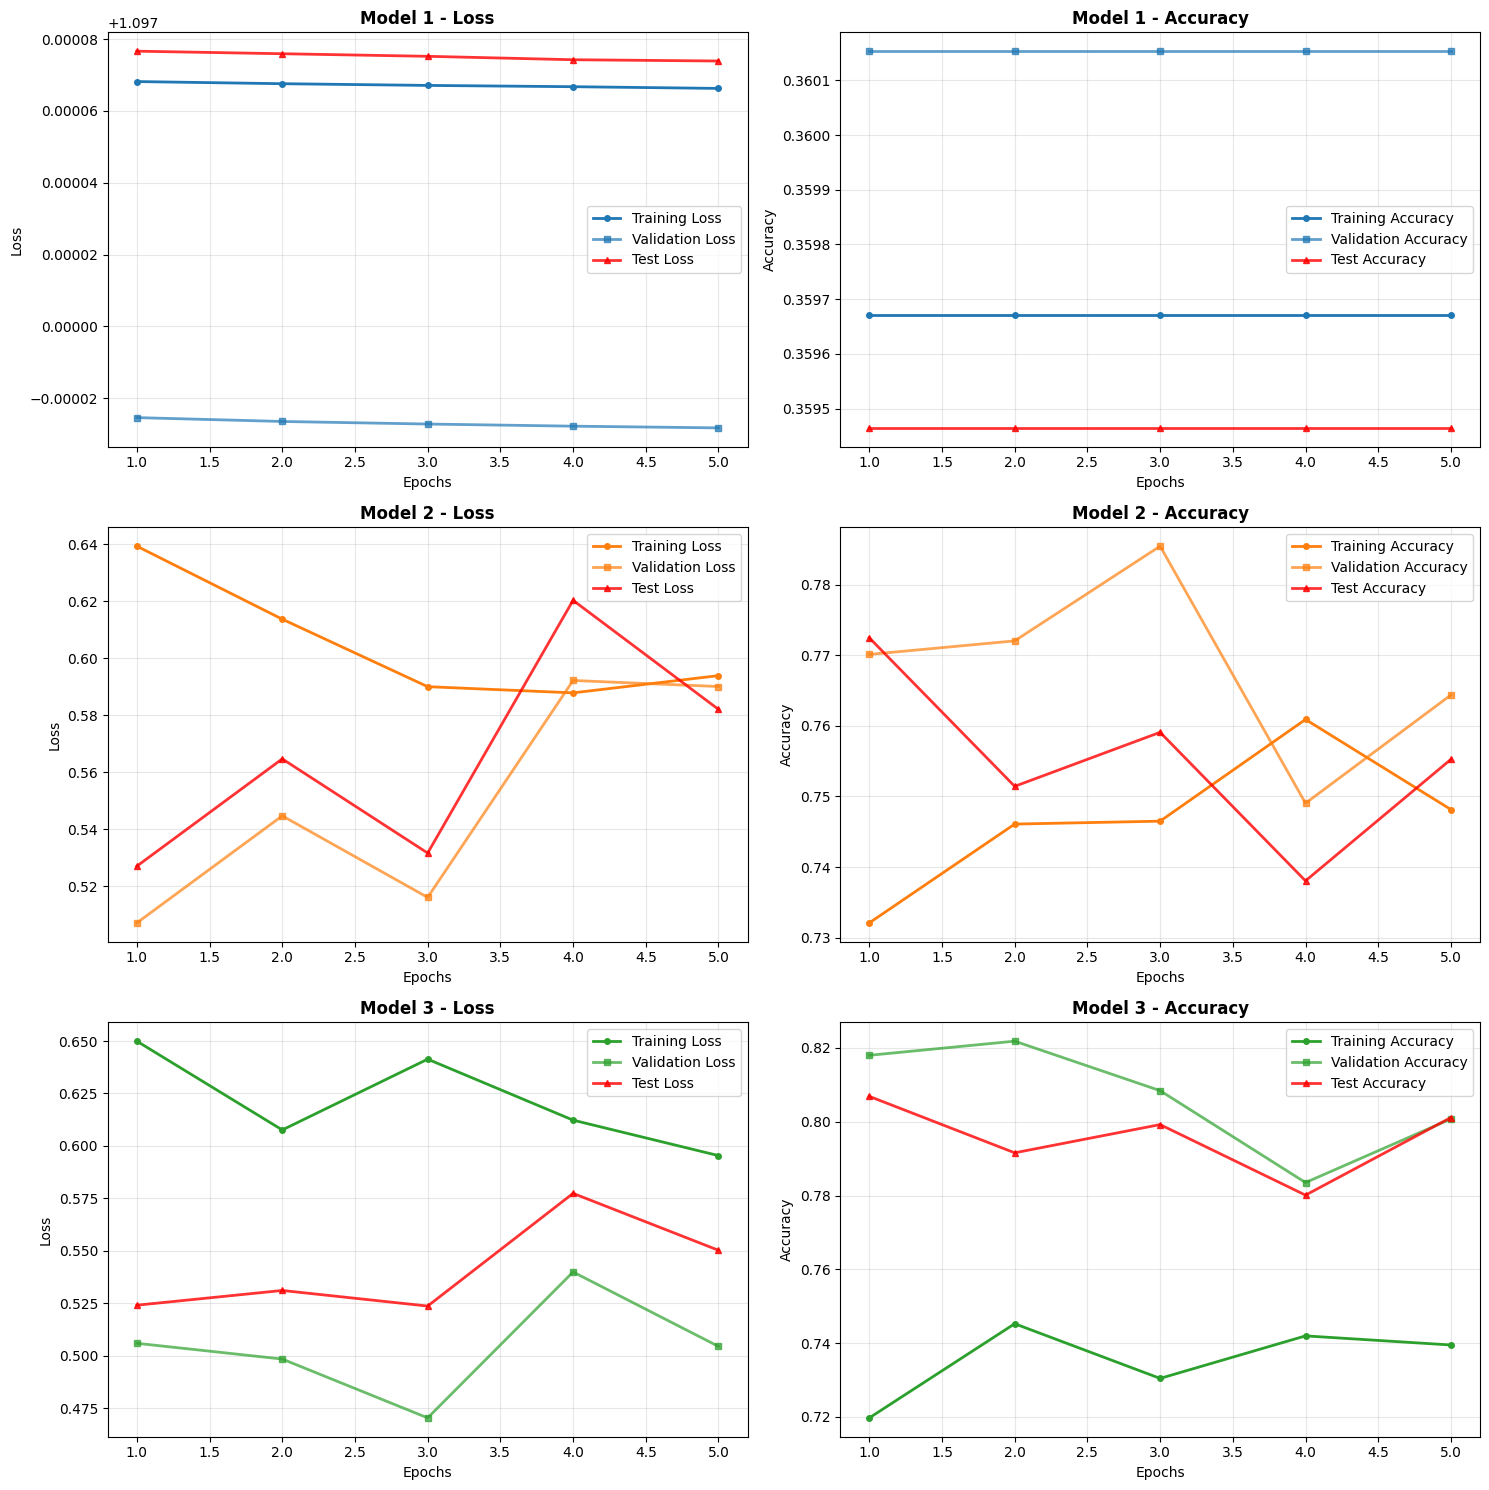

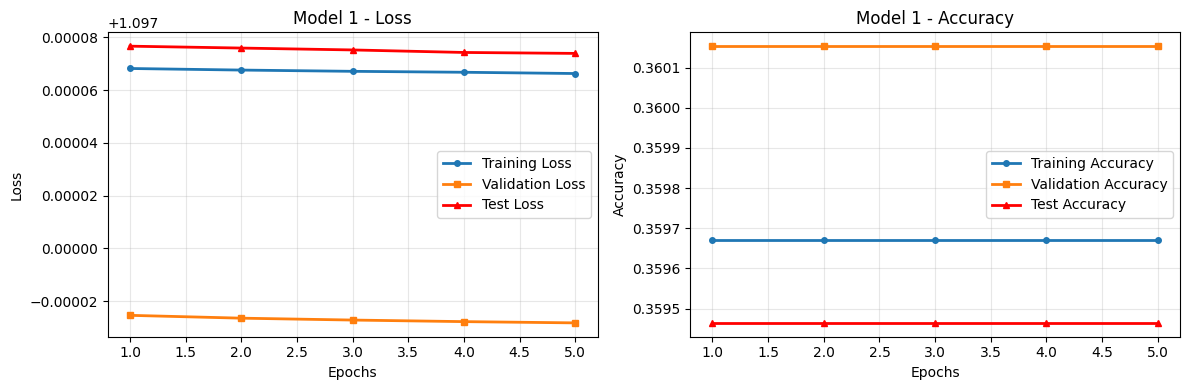

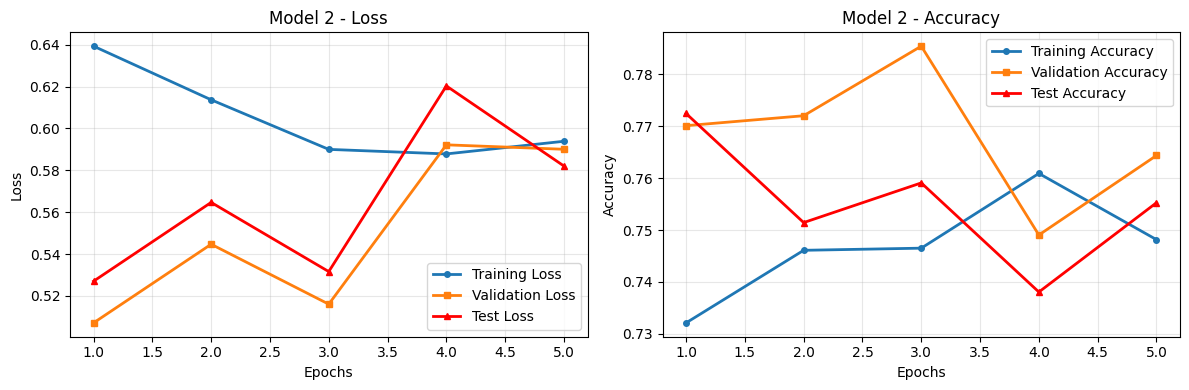

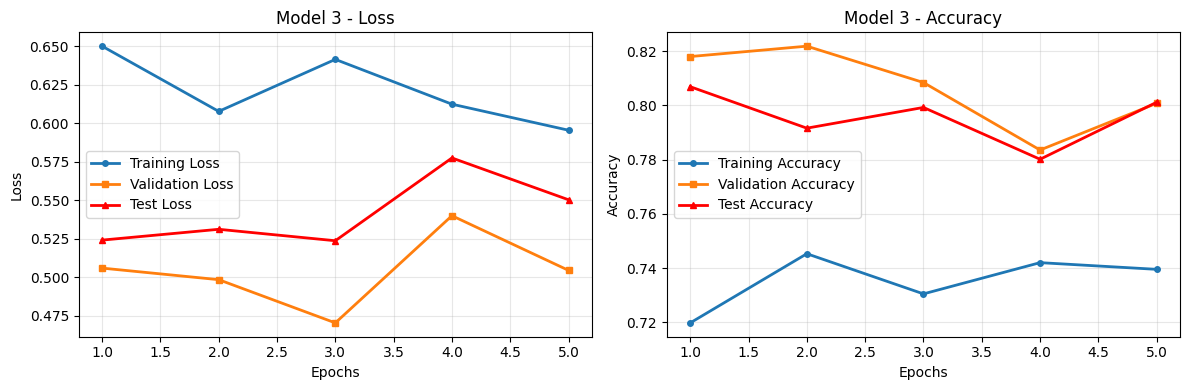

In [ ]:
# =============================================================================
# REPLACE YOUR TRAINING SECTION WITH THIS
# =============================================================================

# Train all models with test evaluation
models_info = [
    (model1, "Model 1: 3 Layers CNN"),
    (model2, "Model 2: 11 Layers CNN"),
    (model3, "Model 3: Different Architecture CNN")
]

histories = []
for model, name in models_info:
    history = train_model_with_test_eval(model, name, train_ds, val_ds, test_ds, epochs=5)
    histories.append(history)

# =============================================================================
# PLOT ALL MODELS WITH TEST METRICS
# =============================================================================

model_names_short = ["Model 1", "Model 2", "Model 3"]

# Plot all models together
plot_training_history_with_test(histories, model_names_short)

# Or plot each model individually
for history, name in zip(histories, model_names_short):
    plot_individual_model_with_test(history, name)

# =============================================================================
# ALTERNATIVE: IF YOU WANT TO USE YOUR ORIGINAL LOOP STRUCTURE
# =============================================================================

def plot_from_lists_with_test(model_names, train_losses, val_losses, test_losses,
                             train_accuracies, val_accuracies, test_accuracies):
    """
    Plot from separate lists including test metrics
    """

    for name, train_loss, val_loss, test_loss, train_acc, val_acc, test_acc in zip(
        model_names, train_losses, val_losses, test_losses,
        train_accuracies, val_accuracies, test_accuracies):

        print(f"\n{name} - Length check:")
        print(f"Train losses: {len(train_loss)}, Val losses: {len(val_loss)}, Test losses: {len(test_loss)}")
        print(f"Train accuracies: {len(train_acc)}, Val accuracies: {len(val_acc)}, Test accuracies: {len(test_acc)}")

        # Find minimum length to ensure consistency
        min_length = min(len(train_loss), len(val_loss), len(test_loss),
                        len(train_acc), len(val_acc), len(test_acc))
        print(f"{name} - Using minimum length: {min_length}")

        epochs_range = range(1, min_length + 1)

        plt.figure(figsize=(12, 4))

        # Plot Loss
        plt.subplot(1, 2, 1)
        plt.plot(epochs_range, train_loss[:min_length], 'o-', label='Train Loss', linewidth=2, markersize=4)
        plt.plot(epochs_range, val_loss[:min_length], 's-', label='Validation Loss', linewidth=2, markersize=4)
        plt.plot(epochs_range, test_loss[:min_length], '^-', label='Test Loss', color='red', linewidth=2, markersize=4)
        plt.title(f'{name} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # # Plot Accuracy
        # plt.subplot(1, 2, 2)
        # plt.plot(epochs_range, train_acc[:min_length], 'o-', label='Train Accuracy', linewidth=2, markersize=4)
        # plt.plot(epochs_range, val_acc[:min_length], 's-', label='Validation Accuracy', linewidth=2, markersize=4)
        # plt.plot(epochs_range, test_acc[:min_length], '^-', label='Test Accuracy', color='red', linewidth=2, markersize=4)
        # plt.title(f'{name} - Accuracy')
        # plt.xlabel('Epochs')
        # plt.ylabel('Accuracy')
        # plt.legend()
        # plt.grid(True, alpha=0.3)

        # plt.tight_layout()
        # plt.show()



FINAL RESULTS SUMMARY
Model 1: 11 Layers CNN: 0.3595
Model 2: Different Architecture CNN: 0.7075
Model 3: Powerful Deep CNN: 0.7667

🏆 Best performing model: Model 3: Powerful Deep CNN
🎯 Best test accuracy: 0.7667

💾 Best model saved as 'best_lung_disease_model.keras'
📄 Model architecture saved as 'best_model_architecture.json'

📊 TRAINING SUMMARY:
Dataset: Lung Disease Classification
Image Size: (64, 64)
Batch Size: 32
Classes: ['Lung_Opacity', 'Normal', 'Viral Pneumonia']
Number of Classes: 3
Training Epochs: 5

🎉 TRAINING AND EVALUATION COMPLETED SUCCESSFULLY! 🎉

SAMPLE PREDICTIONS FROM BEST MODEL


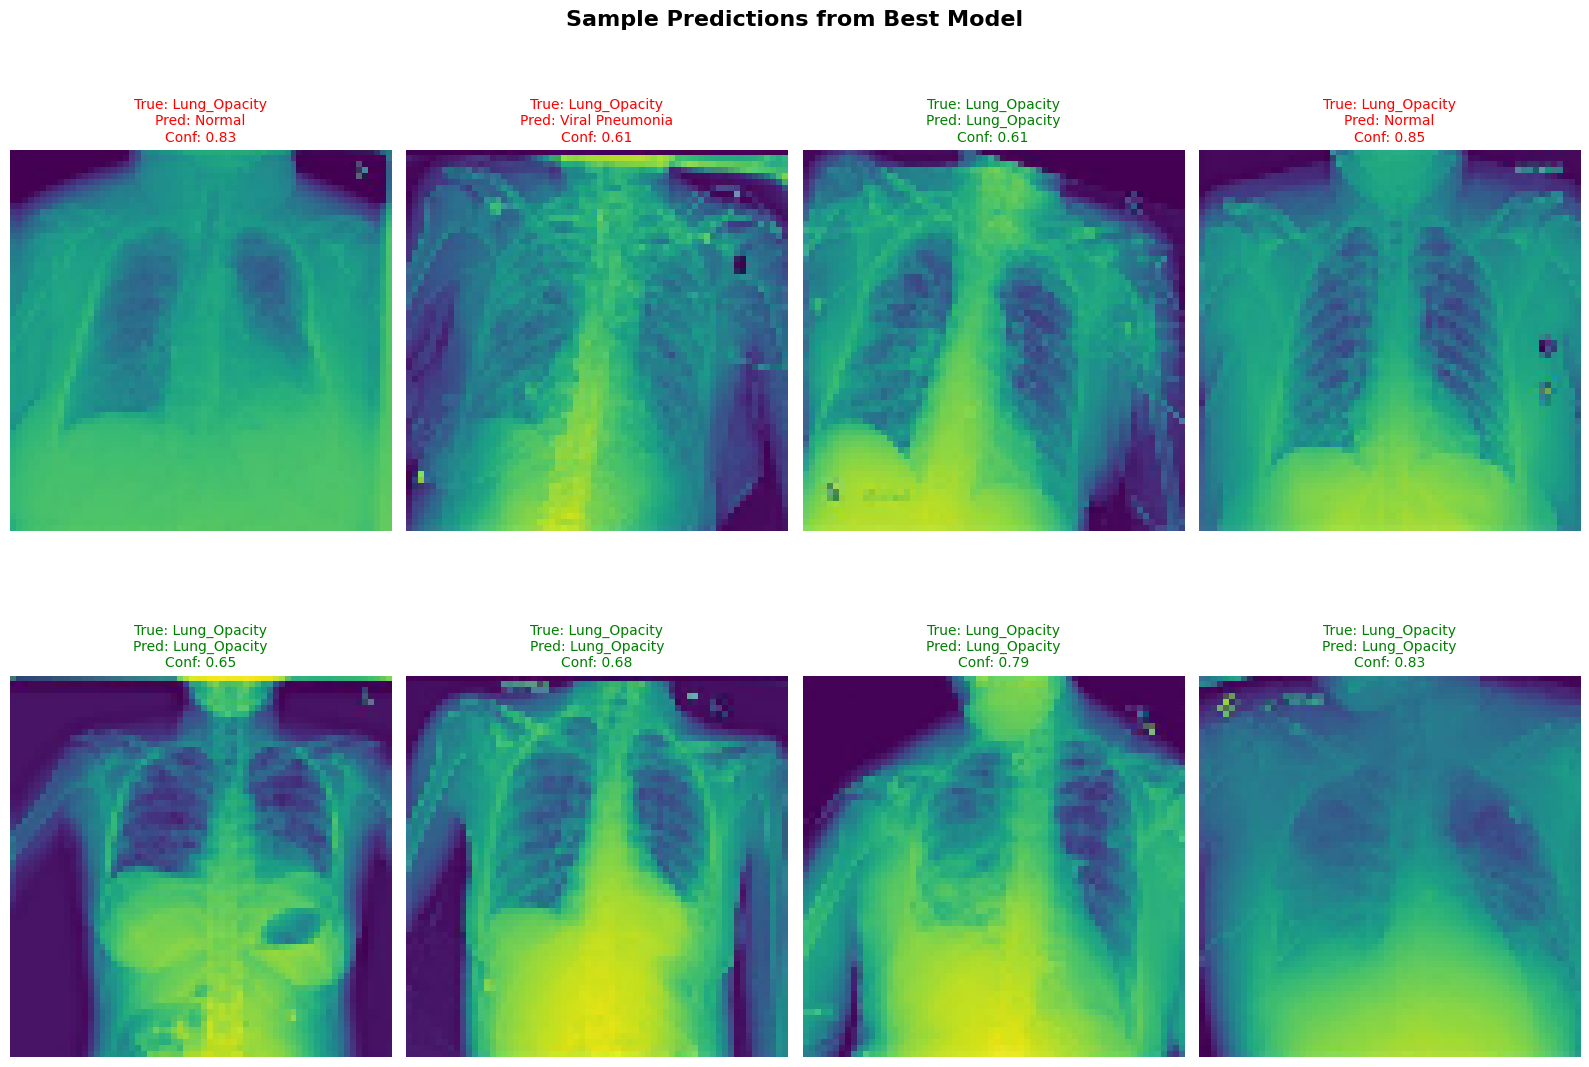

In [ ]:
# =============================================================================
# STEP 12: FINAL RESULTS AND MODEL SAVING
# =============================================================================

print("\n" + "="*60)
print("FINAL RESULTS SUMMARY")
print("="*60)

# Print results summary
for result in evaluation_results:
    print(f"{result['name']}: {result['accuracy']:.4f}")

# Find best model
best_model_idx = np.argmax(test_accuracies)
best_result = evaluation_results[best_model_idx]

print(f"\n🏆 Best performing model: {best_result['name']}")
print(f"🎯 Best test accuracy: {best_result['accuracy']:.4f}")

# Save the best model
try:
    best_result['model'].save('best_lung_disease_model.keras')
    print(f"\n💾 Best model saved as 'best_lung_disease_model.keras'")

    # Also save model architecture as JSON
    model_json = best_result['model'].to_json()
    with open("best_model_architecture.json", "w") as json_file:
        json_file.write(model_json)
    print("📄 Model architecture saved as 'best_model_architecture.json'")

except Exception as e:
    print(f"\n❌ Error saving model: {e}")

# Print training summary
print(f"\n📊 TRAINING SUMMARY:")
print(f"Dataset: Lung Disease Classification")
print(f"Image Size: {IMG_SIZE}")
print(f"Batch Size: {BATCH_SIZE}")
print(f"Classes: {class_names}")
print(f"Number of Classes: {num_classes}")
print(f"Training Epochs: {EPOCHS}")

print(f"\n{'='*60}")
print("🎉 TRAINING AND EVALUATION COMPLETED SUCCESSFULLY! 🎉")
print(f"{'='*60}")

# Optional: Display sample predictions
print("\n" + "="*50)
print("SAMPLE PREDICTIONS FROM BEST MODEL")
print("="*50)

def show_sample_predictions(model, test_ds, class_names, num_samples=8):
    plt.figure(figsize=(16, 12))

    for images, labels in test_ds.take(1):
        predictions = model.predict(images[:num_samples], verbose=0)

        for i in range(num_samples):
            ax = plt.subplot(2, 4, i + 1)
            plt.imshow(images[i])

            true_label = class_names[labels[i]]
            pred_label = class_names[np.argmax(predictions[i])]
            confidence = np.max(predictions[i])

            color = 'green' if true_label == pred_label else 'red'
            plt.title(f'True: {true_label}\nPred: {pred_label}\nConf: {confidence:.2f}',
                     color=color, fontsize=10)
            plt.axis('off')
        break

    plt.suptitle('Sample Predictions from Best Model', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

show_sample_predictions(best_result['model'], test_ds, class_names)